In [1]:
import os

from astropy.io import fits
from astropy.table import Table, hstack

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from matplotlib.patches import Rectangle

plt.rcParams.update({
    'font.family'      :'serif',
    'font.size'        : 24,
    'font.serif'       :'Georgia',
    'axes.labelsize'   :'large',
    'mathtext.fontset' :'stix',
    'axes.linewidth'   :  1.5,
    'xtick.direction'  :'in',
    'ytick.direction'  :'in',
    'xtick.major.size' : 5,
    'ytick.major.size' : 5,
    'xtick.major.width': 1.2,
    'ytick.major.width': 1.2,
})

def Table_to_array(table):
    tuple_data = table.as_array()
    list_data  = [list(values) for values in tuple_data]
    array_data = np.array(list_data, dtype = np.float32)

    return array_data

In [2]:
#Load in KiDS data
with fits.open('/data2/lsajkov/mpdg/data_products/KiDS/KiDS_SOM_panchrom_25Jul24.fits') as cat:
    KiDS_cat = Table(cat[1].data)

#Load in GAMA data
with fits.open('/data2/lsajkov/mpdg/data_products/GAMA/GAMA_SOM_panchromatic_catalog_25Jul24.fits') as cat:
    GAMA_cat = Table(cat[1].data)

In [3]:
#Select the needed training data
KiDS_mag_cut = KiDS_cat['r_mag'] < 20.5
KiDS_redshift_cut = KiDS_cat['redshift'] < 0.4
KiDS_size_cut = KiDS_cat['half_light_radius'] < 5

training_cat = KiDS_cat[KiDS_redshift_cut & KiDS_mag_cut & KiDS_size_cut]

# training_data_columns = ['r_mag',
#                         *[key for key in training_cat.colnames if key.endswith('col')],
#                          'redshift']

training_data_columns = [key for key in training_cat.colnames if key.endswith('col')]
# training_data_columns.append('redshift')

training_data = training_cat[training_data_columns]
training_data_names = training_data_columns

training_data = Table_to_array(training_data)

In [4]:
#Select the needed labeling data

GAMA_mag_cut = GAMA_cat['r_mag'] < 20.5
GAMA_redshift_cut = GAMA_cat['redshift'] < 0.4
GAMA_size_cut = GAMA_cat['half_light_radius'] < 5

labels_cat = GAMA_cat[GAMA_redshift_cut & GAMA_mag_cut & GAMA_size_cut]

# labeling_data_columns = ['r_mag',
#                         *[key for key in labels_cat.colnames if key.endswith('col')],
#                          'redshift']
labeling_data_columns = [key for key in labels_cat.colnames if key.endswith('col')]
# labeling_data_columns.append('redshift')

labeling_data_inputs = labels_cat[labeling_data_columns]

labeling_data_inputs = Table_to_array(labeling_data_inputs)

labeling_data_outputs = labels_cat['redshift', 'mstar']

labeling_data_outputs = Table_to_array(labeling_data_outputs)

labeling_parameter_names = ['redshift','mstar']


In [5]:
import somoclu

In [6]:
#set parameters

maptype        = 'toroid'
gridtype       = 'hexagonal'

initialization = 'pca'

neighborhood   = 'gaussian'
std_coeff      = 0.5

verbose        = 2

compactsupport = False

#training parameters
epochs        = 50

radius0       = 0
radiusN       = 1
radiuscooling = 'exponential'

scale0        = 0.25
scaleN        = 0.01
scalecooling  = 'exponential'

<>:69: SyntaxWarning: invalid escape sequence '\l'
<>:69: SyntaxWarning: invalid escape sequence '\l'
/var/tmp/lsajkov/ipykernel_3512613/798473904.py:69: SyntaxWarning: invalid escape sequence '\l'
  ax_r.set_xlabel('$\log_{10}(M_*/M_{\odot})$')


      2% [==                                                ]
      4% [===                                               ]
      6% [====                                              ]
      8% [=====                                             ]
     10% [======                                            ]
     12% [=======                                           ]
     14% [========                                          ]
     16% [=========                                         ]
     18% [==========                                        ]
     20% [===========                                       ]
     22% [============                                      ]
     24% [=============                                     ]
     26% [==============                                    ]
     28% [===============                                   ]
     30% [================                                  ]
     32% [=================                                 ]
     34%

Time for epoch 1: 0.2249 Time for epoch 2: 0.2181 Time for epoch 3: 0.238 Time for epoch 4: 0.2717 Time for epoch 5: 0.2774 Time for epoch 6: 0.2502 Time for epoch 7: 0.2507 Time for epoch 8: 0.2498 Time for epoch 9: 0.1959 Time for epoch 10: 0.3089 Time for epoch 11: 0.3542 Time for epoch 12: 0.5572 Time for epoch 13: 0.3731 Time for epoch 14: 0.3582 Time for epoch 15: 0.3541 Time for epoch 16: 0.2907 Time for epoch 17: 0.2326 Time for epoch 18: 0.2062 Time for epoch 19: 0.2822 Time for epoch 20: 0.2303 Time for epoch 21: 0.2362 Time for epoch 22: 0.2185 Time for epoch 23: 0.2283 Time for epoch 24: 0.2371 Time for epoch 25: 0.223 Time for epoch 26: 0.2365 Time for epoch 27: 0.2245 Time for epoch 28: 0.2789 Time for epoch 29: 0.1971 Time for epoch 30: 0.2061 Time for epoch 31: 0.2345 Time for epoch 32: 0.2296 Time for epoch 33: 0.2329 Time for epoch 34: 0.2196 Time for epoch 35: 0.2288 Time for epoch 36: 0.2275 Time for epoch 37: 0.2122 Time for epoch 38: 0.2589 Time for epoch 39: 0.19

      2% [==                                                ]
      4% [===                                               ]
      6% [====                                              ]
      8% [=====                                             ]
     10% [======                                            ]
     12% [=======                                           ]
     14% [========                                          ]
     16% [=========                                         ]
     18% [==========                                        ]
     20% [===========                                       ]
     22% [============                                      ]
     24% [=============                                     ]
     26% [==============                                    ]
     28% [===============                                   ]
     30% [================                                  ]
     32% [=================                                 ]
     34%

Time for epoch 1: 0.4019 Time for epoch 2: 0.4201 Time for epoch 3: 0.4173 Time for epoch 4: 0.548 Time for epoch 5: 0.4485 Time for epoch 6: 0.4337 Time for epoch 7: 0.4407 Time for epoch 8: 0.5454 Time for epoch 9: 0.4269 Time for epoch 10: 0.4467 Time for epoch 11: 0.4253 Time for epoch 12: 0.3987 Time for epoch 13: 0.4881 Time for epoch 14: 0.404 Time for epoch 15: 0.4094 Time for epoch 16: 0.3998 Time for epoch 17: 0.4794 Time for epoch 18: 0.5491 Time for epoch 19: 0.3854 Time for epoch 20: 0.4035 Time for epoch 21: 0.399 Time for epoch 22: 0.3828 Time for epoch 23: 0.4887 Time for epoch 24: 0.4179 Time for epoch 25: 0.4247 Time for epoch 26: 0.4142 Time for epoch 27: 0.4203 Time for epoch 28: 0.4626 Time for epoch 29: 0.4454 Time for epoch 30: 0.4345 Time for epoch 31: 0.3906 Time for epoch 32: 0.4131 Time for epoch 33: 0.4589 Time for epoch 34: 0.4554 Time for epoch 35: 0.4523 Time for epoch 36: 0.4635 Time for epoch 37: 0.4252 Time for epoch 38: 0.415 Time for epoch 39: 0.4114

      2% [==                                                ]
      4% [===                                               ]
      6% [====                                              ]
      8% [=====                                             ]
     10% [======                                            ]
     12% [=======                                           ]
     14% [========                                          ]
     16% [=========                                         ]
     18% [==========                                        ]
     20% [===========                                       ]
     22% [============                                      ]
     24% [=============                                     ]
     26% [==============                                    ]
     28% [===============                                   ]
     30% [================                                  ]
     32% [=================                                 ]
     34%

Time for epoch 1: 0.6015 Time for epoch 2: 0.6497 Time for epoch 3: 0.5425 Time for epoch 4: 0.5462 Time for epoch 5: 0.5664 Time for epoch 6: 0.6335 Time for epoch 7: 0.5853 Time for epoch 8: 0.5975 Time for epoch 9: 0.6255 Time for epoch 10: 0.5718 Time for epoch 11: 0.538 Time for epoch 12: 0.5169 Time for epoch 13: 0.5202 Time for epoch 14: 0.6192 Time for epoch 15: 0.5653 Time for epoch 16: 0.4983 Time for epoch 17: 0.5072 Time for epoch 18: 0.5872 Time for epoch 19: 0.5544 Time for epoch 20: 0.5154 Time for epoch 21: 0.5411 Time for epoch 22: 0.561 Time for epoch 23: 0.5286 Time for epoch 24: 0.5279 Time for epoch 25: 0.5024 Time for epoch 26: 0.622 Time for epoch 27: 0.5316 Time for epoch 28: 0.5365 Time for epoch 29: 0.5375 Time for epoch 30: 0.6451 Time for epoch 31: 0.5347 Time for epoch 32: 0.6311 Time for epoch 33: 0.6344 Time for epoch 34: 0.5487 Time for epoch 35: 0.5475 Time for epoch 36: 0.5397 Time for epoch 37: 0.599 Time for epoch 38: 0.5657 Time for epoch 39: 0.5345

      2% [==                                                ]
      4% [===                                               ]
      6% [====                                              ]
      8% [=====                                             ]
     10% [======                                            ]
     12% [=======                                           ]
     14% [========                                          ]
     16% [=========                                         ]
     18% [==========                                        ]
     20% [===========                                       ]
     22% [============                                      ]
     24% [=============                                     ]
     26% [==============                                    ]
     28% [===============                                   ]
     30% [================                                  ]
     32% [=================                                 ]
     34%

Time for epoch 1: 0.5954 Time for epoch 2: 0.5956 Time for epoch 3: 0.6582 Time for epoch 4: 0.5537 Time for epoch 5: 0.6627 Time for epoch 6: 0.6212 Time for epoch 7: 0.6057 Time for epoch 8: 0.7448 Time for epoch 9: 0.5706 Time for epoch 10: 0.6818 Time for epoch 11: 0.6851 Time for epoch 12: 0.6816 Time for epoch 13: 0.6457 Time for epoch 14: 0.6195 Time for epoch 15: 0.6423 Time for epoch 16: 0.6095 Time for epoch 17: 0.6121 Time for epoch 18: 0.6725 Time for epoch 19: 0.5748 Time for epoch 20: 0.5691 Time for epoch 21: 0.6236 Time for epoch 22: 0.7386 Time for epoch 23: 0.6368 Time for epoch 24: 0.7045 Time for epoch 25: 0.7327 Time for epoch 26: 0.5508 Time for epoch 27: 0.6763 Time for epoch 28: 0.7644 Time for epoch 29: 0.577 Time for epoch 30: 0.6649 Time for epoch 31: 0.6213 Time for epoch 32: 0.6747 Time for epoch 33: 0.5994 Time for epoch 34: 0.5985 Time for epoch 35: 0.6801 Time for epoch 36: 0.6203 Time for epoch 37: 0.6378 Time for epoch 38: 0.7176 Time for epoch 39: 0.7

      2% [==                                                ]
      4% [===                                               ]
      6% [====                                              ]
      8% [=====                                             ]
     10% [======                                            ]
     12% [=======                                           ]
     14% [========                                          ]
     16% [=========                                         ]
     18% [==========                                        ]
     20% [===========                                       ]
     22% [============                                      ]
     24% [=============                                     ]
     26% [==============                                    ]
     28% [===============                                   ]
     30% [================                                  ]
     32% [=================                                 ]
     34%

Time for epoch 1: 1.045 Time for epoch 2: 0.9733 Time for epoch 3: 1.031 Time for epoch 4: 1.053 Time for epoch 5: 1.03 Time for epoch 6: 1.087 Time for epoch 7: 1.032 Time for epoch 8: 0.9945 Time for epoch 9: 1.003 Time for epoch 10: 1.061 Time for epoch 11: 0.9885 Time for epoch 12: 0.99 Time for epoch 13: 0.9601 Time for epoch 14: 1.051 Time for epoch 15: 0.9671 Time for epoch 16: 1.011 Time for epoch 17: 0.9534 Time for epoch 18: 0.9341 Time for epoch 19: 1.05 Time for epoch 20: 0.8601 Time for epoch 21: 1.023 Time for epoch 22: 1.072 Time for epoch 23: 1.063 Time for epoch 24: 1.004 Time for epoch 25: 1.019 Time for epoch 26: 1.101 Time for epoch 27: 0.9854 Time for epoch 28: 0.9645 Time for epoch 29: 0.9786 Time for epoch 30: 1.005 Time for epoch 31: 0.9767 Time for epoch 32: 1.044 Time for epoch 33: 1.104 Time for epoch 34: 1.104 Time for epoch 35: 1.087 Time for epoch 36: 1.277 Time for epoch 37: 1.519 Time for epoch 38: 1.58 Time for epoch 39: 1.916 Time for epoch 40: 2.164 T

      2% [==                                                ]
      4% [===                                               ]
      6% [====                                              ]
      8% [=====                                             ]
     10% [======                                            ]
     12% [=======                                           ]
     14% [========                                          ]
     16% [=========                                         ]
     18% [==========                                        ]
     20% [===========                                       ]
     22% [============                                      ]
     24% [=============                                     ]
     26% [==============                                    ]
     28% [===============                                   ]
     30% [================                                  ]
     32% [=================                                 ]
     34%

Time for epoch 1: 1.404 Time for epoch 2: 1.405 Time for epoch 3: 1.384 Time for epoch 4: 1.339 Time for epoch 5: 1.321 Time for epoch 6: 1.331 Time for epoch 7: 1.302 Time for epoch 8: 1.316 Time for epoch 9: 1.364 Time for epoch 10: 1.391 Time for epoch 11: 1.316 Time for epoch 12: 1.403 Time for epoch 13: 1.317 Time for epoch 14: 1.459 Time for epoch 15: 1.47 Time for epoch 16: 1.487 Time for epoch 17: 1.453 Time for epoch 18: 1.466 Time for epoch 19: 1.354 Time for epoch 20: 1.388 Time for epoch 21: 1.397 Time for epoch 22: 1.399 Time for epoch 23: 1.339 Time for epoch 24: 1.341 Time for epoch 25: 1.434 Time for epoch 26: 1.322 Time for epoch 27: 1.324 Time for epoch 28: 1.443 Time for epoch 29: 1.372 Time for epoch 30: 1.365 Time for epoch 31: 1.518 Time for epoch 32: 1.469 Time for epoch 33: 1.515 Time for epoch 34: 1.796 Time for epoch 35: 2.339 Time for epoch 36: 2.562 Time for epoch 37: 3.082 Time for epoch 38: 3.118 Time for epoch 39: 3.598 Time for epoch 40: 3.506 Time for e

      2% [==                                                ]
      4% [===                                               ]
      6% [====                                              ]
      8% [=====                                             ]
     10% [======                                            ]
     12% [=======                                           ]
     14% [========                                          ]
     16% [=========                                         ]
     18% [==========                                        ]
     20% [===========                                       ]
     22% [============                                      ]
     24% [=============                                     ]
     26% [==============                                    ]
     28% [===============                                   ]
     30% [================                                  ]
     32% [=================                                 ]
     34%

Time for epoch 1: 1.394 Time for epoch 2: 1.78 Time for epoch 3: 1.638 Time for epoch 4: 1.517 Time for epoch 5: 1.556 Time for epoch 6: 1.419 Time for epoch 7: 1.483 Time for epoch 8: 1.528 Time for epoch 9: 1.549 Time for epoch 10: 1.61 Time for epoch 11: 1.495 Time for epoch 12: 1.641 Time for epoch 13: 1.602 Time for epoch 14: 1.598 Time for epoch 15: 1.603 Time for epoch 16: 1.63 Time for epoch 17: 1.642 Time for epoch 18: 1.498 Time for epoch 19: 1.534 Time for epoch 20: 1.598 Time for epoch 21: 1.536 Time for epoch 22: 1.531 Time for epoch 23: 1.591 Time for epoch 24: 1.542 Time for epoch 25: 1.572 Time for epoch 26: 1.646 Time for epoch 27: 1.623 Time for epoch 28: 1.581 Time for epoch 29: 1.563 Time for epoch 30: 1.61 Time for epoch 31: 1.573 Time for epoch 32: 1.69 Time for epoch 33: 1.861 Time for epoch 34: 2.332 Time for epoch 35: 3.067 Time for epoch 36: 3.345 Time for epoch 37: 3.677 Time for epoch 38: 4.072 Time for epoch 39: 4.208 Time for epoch 40: 4.123 Time for epoch

      2% [==                                                ]
      4% [===                                               ]
      6% [====                                              ]
      8% [=====                                             ]
     10% [======                                            ]
     12% [=======                                           ]
     14% [========                                          ]
     16% [=========                                         ]
     18% [==========                                        ]
     20% [===========                                       ]
     22% [============                                      ]
     24% [=============                                     ]
     26% [==============                                    ]
     28% [===============                                   ]
     30% [================                                  ]
     32% [=================                                 ]
     34%

/data2/lsajkov/mpdg/conda/envs/mpdg/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/data2/lsajkov/mpdg/conda/envs/mpdg/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


      2% [==                                                ]
      4% [===                                               ]
      6% [====                                              ]
      8% [=====                                             ]
     10% [======                                            ]
     12% [=======                                           ]
     14% [========                                          ]
     16% [=========                                         ]
     18% [==========                                        ]
     20% [===========                                       ]
     22% [============                                      ]
     24% [=============                                     ]
     26% [==============                                    ]
     28% [===============                                   ]
     30% [================                                  ]
     32% [=================                                 ]
     34%

Time for epoch 1: 2.136 Time for epoch 2: 2.332 Time for epoch 3: 2.047 Time for epoch 4: 2.121 Time for epoch 5: 2.124 Time for epoch 6: 2.017 Time for epoch 7: 2.097 Time for epoch 8: 2.059 Time for epoch 9: 2.008 Time for epoch 10: 2.026 Time for epoch 11: 2.08 Time for epoch 12: 2.138 Time for epoch 13: 2.243 Time for epoch 14: 2.191 Time for epoch 15: 2.13 Time for epoch 16: 1.919 Time for epoch 17: 2.057 Time for epoch 18: 2.053 Time for epoch 19: 2.117 Time for epoch 20: 2.069 Time for epoch 21: 1.951 Time for epoch 22: 2.013 Time for epoch 23: 2.104 Time for epoch 24: 2.039 Time for epoch 25: 2.126 Time for epoch 26: 2.21 Time for epoch 27: 2.142 Time for epoch 28: 2.159 Time for epoch 29: 1.925 Time for epoch 30: 2.177 Time for epoch 31: 2.384 Time for epoch 32: 2.801 Time for epoch 33: 3.586 Time for epoch 34: 3.967 Time for epoch 35: 4.88 Time for epoch 36: 5.255 Time for epoch 37: 5.599 Time for epoch 38: 5.651 Time for epoch 39: 5.797 Time for epoch 40: 5.338 Time for epoc

      2% [==                                                ]
      4% [===                                               ]
      6% [====                                              ]
      8% [=====                                             ]
     10% [======                                            ]
     12% [=======                                           ]
     14% [========                                          ]
     16% [=========                                         ]
     18% [==========                                        ]
     20% [===========                                       ]
     22% [============                                      ]
     24% [=============                                     ]
     26% [==============                                    ]
     28% [===============                                   ]
     30% [================                                  ]
     32% [=================                                 ]
     34%

/data2/lsajkov/mpdg/conda/envs/mpdg/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/data2/lsajkov/mpdg/conda/envs/mpdg/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
Time for epoch 1: 2.518 Time for epoch 2: 2.678 Time for epoch 3: 2.737 Time for epoch 4: 2.464 Time for epoch 5: 2.569 Time for epoch 6: 2.758 Time for epoch 7: 2.47 Time for epoch 8: 2.402 Time for epoch 9: 2.438 Time for epoch 10: 2.504 Time for epoch 11: 2.419 Time for epoch 12: 2.552 Time for epoch 13: 2.642 Time for epoch 14: 2.547 Time for epoch 15: 2.551 Time for epoch 16: 2.583 Time for epoch 17: 2.537 Time for epoch 18: 2.577 Time for epoch 19: 2.527 Time for epoch 20: 2.623 Time for epoch 21: 2.704 Time for epoch 22: 2.585 Time for epoch 23: 2.511 Time for epoch 24: 2.478 Time for epoch 25: 2.537 Time for ep

      2% [==                                                ]
      4% [===                                               ]
      6% [====                                              ]
      8% [=====                                             ]
     10% [======                                            ]
     12% [=======                                           ]
     14% [========                                          ]
     16% [=========                                         ]
     18% [==========                                        ]
     20% [===========                                       ]
     22% [============                                      ]
     24% [=============                                     ]
     26% [==============                                    ]
     28% [===============                                   ]
     30% [================                                  ]
     32% [=================                                 ]
     34%

/data2/lsajkov/mpdg/conda/envs/mpdg/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/data2/lsajkov/mpdg/conda/envs/mpdg/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
Time for epoch 1: 2.929 Time for epoch 2: 3.012 Time for epoch 3: 3.036 Time for epoch 4: 2.884 Time for epoch 5: 2.806 Time for epoch 6: 2.776 Time for epoch 7: 2.876 Time for epoch 8: 2.894 Time for epoch 9: 2.936 Time for epoch 10: 2.893 Time for epoch 11:  3.2 Time for epoch 12: 2.841 Time for epoch 13: 3.065 Time for epoch 14: 2.836 Time for epoch 15: 2.89 Time for epoch 16: 3.052 Time for epoch 17: 2.929 Time for epoch 18: 2.693 Time for epoch 19: 2.864 Time for epoch 20: 2.911 Time for epoch 21: 2.87 Time for epoch 22: 3.159 Time for epoch 23: 2.904 Time for epoch 24: 2.919 Time for epoch 25: 2.874 Time for epoc

      2% [==                                                ]
      4% [===                                               ]
      6% [====                                              ]
      8% [=====                                             ]
     10% [======                                            ]
     12% [=======                                           ]
     14% [========                                          ]
     16% [=========                                         ]
     18% [==========                                        ]
     20% [===========                                       ]
     22% [============                                      ]
     24% [=============                                     ]
     26% [==============                                    ]
     28% [===============                                   ]
     30% [================                                  ]
     32% [=================                                 ]
     34%

/data2/lsajkov/mpdg/conda/envs/mpdg/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/data2/lsajkov/mpdg/conda/envs/mpdg/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
Time for epoch 1: 3.114 Time for epoch 2: 3.358 Time for epoch 3: 3.448 Time for epoch 4: 3.201 Time for epoch 5: 3.309 Time for epoch 6: 3.178 Time for epoch 7: 3.538 Time for epoch 8: 3.279 Time for epoch 9: 3.625 Time for epoch 10: 3.286 Time for epoch 11: 3.436 Time for epoch 12: 3.37 Time for epoch 13: 3.425 Time for epoch 14: 3.321 Time for epoch 15: 3.179 Time for epoch 16: 3.276 Time for epoch 17: 3.163 Time for epoch 18: 3.373 Time for epoch 19: 3.288 Time for epoch 20: 3.604 Time for epoch 21: 3.398 Time for epoch 22: 3.626 Time for epoch 23: 3.356 Time for epoch 24: 3.561 Time for epoch 25: 3.389 Time for ep

      2% [==                                                ]
      4% [===                                               ]
      6% [====                                              ]
      8% [=====                                             ]
     10% [======                                            ]
     12% [=======                                           ]
     14% [========                                          ]
     16% [=========                                         ]
     18% [==========                                        ]
     20% [===========                                       ]
     22% [============                                      ]
     24% [=============                                     ]
     26% [==============                                    ]
     28% [===============                                   ]
     30% [================                                  ]
     32% [=================                                 ]
     34%

/data2/lsajkov/mpdg/conda/envs/mpdg/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/data2/lsajkov/mpdg/conda/envs/mpdg/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


      2% [==                                                ]
      4% [===                                               ]
      6% [====                                              ]
      8% [=====                                             ]
     10% [======                                            ]
     12% [=======                                           ]
     14% [========                                          ]
     16% [=========                                         ]
     18% [==========                                        ]
     20% [===========                                       ]
     22% [============                                      ]
     24% [=============                                     ]
     26% [==============                                    ]
     28% [===============                                   ]
     30% [================                                  ]
     32% [=================                                 ]
     34%

Time for epoch 1: 3.62 Time for epoch 2: 3.484 Time for epoch 3: 3.616 Time for epoch 4: 3.52 Time for epoch 5: 3.703 Time for epoch 6: 3.712 Time for epoch 7: 3.785 Time for epoch 8: 3.706 Time for epoch 9: 3.614 Time for epoch 10: 3.707 Time for epoch 11: 3.686 Time for epoch 12: 3.766 Time for epoch 13: 3.798 Time for epoch 14: 3.804 Time for epoch 15: 3.769 Time for epoch 16: 4.013 Time for epoch 17: 3.757 Time for epoch 18: 3.699 Time for epoch 19: 3.441 Time for epoch 20: 3.85 Time for epoch 21: 3.763 Time for epoch 22: 3.839 Time for epoch 23: 3.779 Time for epoch 24: 3.529 Time for epoch 25: 3.744 Time for epoch 26: 3.837 Time for epoch 27: 3.717 Time for epoch 28: 4.009 Time for epoch 29: 5.043 Time for epoch 30: 5.843 Time for epoch 31: 6.918 Time for epoch 32: 8.141 Time for epoch 33: 8.88 Time for epoch 34: 9.531 Time for epoch 35: 9.839 Time for epoch 36: 8.981 Time for epoch 37: 8.883 Time for epoch 38: 8.831 Time for epoch 39: 7.126 Time for epoch 40: 7.397 Time for epoc

      2% [==                                                ]
      4% [===                                               ]
      6% [====                                              ]
      8% [=====                                             ]
     10% [======                                            ]
     12% [=======                                           ]
     14% [========                                          ]
     16% [=========                                         ]
     18% [==========                                        ]
     20% [===========                                       ]
     22% [============                                      ]
     24% [=============                                     ]
     26% [==============                                    ]
     28% [===============                                   ]
     30% [================                                  ]
     32% [=================                                 ]
     34%

/data2/lsajkov/mpdg/conda/envs/mpdg/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/data2/lsajkov/mpdg/conda/envs/mpdg/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
Time for epoch 1: 4.463 Time for epoch 2: 4.345 Time for epoch 3: 4.532 Time for epoch 4: 4.343 Time for epoch 5: 4.392 Time for epoch 6: 4.543 Time for epoch 7: 4.316 Time for epoch 8: 4.713 Time for epoch 9: 4.374 Time for epoch 10: 4.442 Time for epoch 11: 4.39 Time for epoch 12: 4.688 Time for epoch 13: 4.591 Time for epoch 14: 4.412 Time for epoch 15: 4.423 Time for epoch 16: 4.504 Time for epoch 17: 4.499 Time for epoch 18: 4.459 Time for epoch 19: 4.561 Time for epoch 20: 4.697 Time for epoch 21: 4.677 Time for epoch 22: 4.327 Time for epoch 23: 4.598 Time for epoch 24: 4.612 Time for epoch 25: 4.42 Time for epo

      2% [==                                                ]
      4% [===                                               ]
      6% [====                                              ]
      8% [=====                                             ]
     10% [======                                            ]
     12% [=======                                           ]
     14% [========                                          ]
     16% [=========                                         ]
     18% [==========                                        ]
     20% [===========                                       ]
     22% [============                                      ]
     24% [=============                                     ]
     26% [==============                                    ]
     28% [===============                                   ]
     30% [================                                  ]
     32% [=================                                 ]
     34%

/data2/lsajkov/mpdg/conda/envs/mpdg/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/data2/lsajkov/mpdg/conda/envs/mpdg/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
Time for epoch 1: 4.585 Time for epoch 2: 4.69 Time for epoch 3: 4.83 Time for epoch 4: 4.564 Time for epoch 5: 4.752 Time for epoch 6: 5.022 Time for epoch 7: 4.657 Time for epoch 8: 4.951 Time for epoch 9: 4.632 Time for epoch 10: 4.768 Time for epoch 11: 4.989 Time for epoch 12: 4.662 Time for epoch 13: 4.824 Time for epoch 14: 4.781 Time for epoch 15: 4.983 Time for epoch 16: 4.325 Time for epoch 17: 4.412 Time for epoch 18: 4.467 Time for epoch 19: 4.545 Time for epoch 20: 4.502 Time for epoch 21: 4.435 Time for epoch 22: 4.307 Time for epoch 23: 4.446 Time for epoch 24: 4.292 Time for epoch 25: 4.435 Time for epo

      2% [==                                                ]
      4% [===                                               ]
      6% [====                                              ]
      8% [=====                                             ]
     10% [======                                            ]
     12% [=======                                           ]
     14% [========                                          ]
     16% [=========                                         ]
     18% [==========                                        ]
     20% [===========                                       ]
     22% [============                                      ]
     24% [=============                                     ]
     26% [==============                                    ]
     28% [===============                                   ]
     30% [================                                  ]
     32% [=================                                 ]
     34%

/data2/lsajkov/mpdg/conda/envs/mpdg/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/data2/lsajkov/mpdg/conda/envs/mpdg/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
Time for epoch 1: 5.567 Time for epoch 2: 4.902 Time for epoch 3: 4.497 Time for epoch 4: 4.623 Time for epoch 5: 4.816 Time for epoch 6: 4.976 Time for epoch 7: 4.882 Time for epoch 8: 5.07 Time for epoch 9: 5.202 Time for epoch 10: 4.824 Time for epoch 11: 4.906 Time for epoch 12: 4.764 Time for epoch 13: 4.832 Time for epoch 14: 4.906 Time for epoch 15: 4.626 Time for epoch 16: 4.909 Time for epoch 17: 5.211 Time for epoch 18: 4.664 Time for epoch 19: 5.009 Time for epoch 20: 4.818 Time for epoch 21: 4.765 Time for epoch 22: 5.115 Time for epoch 23: 4.93 Time for epoch 24:  4.9 Time for epoch 25: 4.956 Time for epoc

      2% [==                                                ]
      4% [===                                               ]
      6% [====                                              ]
      8% [=====                                             ]
     10% [======                                            ]
     12% [=======                                           ]
     14% [========                                          ]
     16% [=========                                         ]
     18% [==========                                        ]
     20% [===========                                       ]
     22% [============                                      ]
     24% [=============                                     ]
     26% [==============                                    ]
     28% [===============                                   ]
     30% [================                                  ]
     32% [=================                                 ]
     34%

/data2/lsajkov/mpdg/conda/envs/mpdg/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/data2/lsajkov/mpdg/conda/envs/mpdg/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/var/tmp/lsajkov/ipykernel_3512613/798473904.py:48: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize = (24, 10))


      2% [==                                                ]
      4% [===                                               ]
      6% [====                                              ]
      8% [=====                                             ]
     10% [======                                            ]
     12% [=======                                           ]
     14% [========                                          ]
     16% [=========                                         ]
     18% [==========                                        ]
     20% [===========                                       ]
     22% [============                                      ]
     24% [=============                                     ]
     26% [==============                                    ]
     28% [===============                                   ]
     30% [================                                  ]
     32% [=================                                 ]
     34%

Time for epoch 1: 5.983 Time for epoch 2: 5.711 Time for epoch 3: 5.159 Time for epoch 4: 5.197 Time for epoch 5: 5.174 Time for epoch 6: 4.987 Time for epoch 7: 5.085 Time for epoch 8: 5.285 Time for epoch 9: 5.138 Time for epoch 10: 5.172 Time for epoch 11: 5.171 Time for epoch 12: 5.383 Time for epoch 13: 5.304 Time for epoch 14: 5.469 Time for epoch 15:  5.3 Time for epoch 16: 5.161 Time for epoch 17: 5.48 Time for epoch 18: 5.306 Time for epoch 19: 5.287 Time for epoch 20: 5.278 Time for epoch 21: 5.226 Time for epoch 22: 5.191 Time for epoch 23: 5.545 Time for epoch 24: 5.356 Time for epoch 25: 5.565 Time for epoch 26: 5.639 Time for epoch 27: 6.936 Time for epoch 28: 8.685 Time for epoch 29: 9.872 Time for epoch 30: 12.04 Time for epoch 31: 13.2 Time for epoch 32: 13.97 Time for epoch 33: 14.37 Time for epoch 34: 13.11 Time for epoch 35: 12.77 Time for epoch 36: 11.42 Time for epoch 37: 10.97 Time for epoch 38: 10.63 Time for epoch 39: 9.808 Time for epoch 40: 8.976 Time for epo

      2% [==                                                ]
      4% [===                                               ]
      6% [====                                              ]
      8% [=====                                             ]
     10% [======                                            ]
     12% [=======                                           ]
     14% [========                                          ]
     16% [=========                                         ]
     18% [==========                                        ]
     20% [===========                                       ]
     22% [============                                      ]
     24% [=============                                     ]
     26% [==============                                    ]
     28% [===============                                   ]
     30% [================                                  ]
     32% [=================                                 ]
     34%

Time for epoch 1: 6.117 Time for epoch 2: 5.918 Time for epoch 3: 5.441 Time for epoch 4: 5.398 Time for epoch 5: 5.482 Time for epoch 6: 5.538 Time for epoch 7: 5.739 Time for epoch 8: 5.773 Time for epoch 9: 5.43 Time for epoch 10: 5.525 Time for epoch 11: 5.324 Time for epoch 12: 5.822 Time for epoch 13: 5.784 Time for epoch 14: 5.821 Time for epoch 15: 5.761 Time for epoch 16: 5.538 Time for epoch 17: 5.444 Time for epoch 18: 5.857 Time for epoch 19: 5.52 Time for epoch 20: 5.437 Time for epoch 21: 5.594 Time for epoch 22:    6 Time for epoch 23: 5.742 Time for epoch 24: 5.626 Time for epoch 25: 5.58 Time for epoch 26: 6.291 Time for epoch 27: 8.193 Time for epoch 28: 9.858 Time for epoch 29: 11.05 Time for epoch 30: 13.62 Time for epoch 31: 14.95 Time for epoch 32: 15.59 Time for epoch 33: 14.88 Time for epoch 34: 14.08 Time for epoch 35: 13.05 Time for epoch 36: 11.99 Time for epoch 37: 11.51 Time for epoch 38: 10.73 Time for epoch 39: 9.996 Time for epoch 40: 9.46 Time for epoch

      2% [==                                                ]
      4% [===                                               ]
      6% [====                                              ]
      8% [=====                                             ]
     10% [======                                            ]
     12% [=======                                           ]
     14% [========                                          ]
     16% [=========                                         ]
     18% [==========                                        ]
     20% [===========                                       ]
     22% [============                                      ]
     24% [=============                                     ]
     26% [==============                                    ]
     28% [===============                                   ]
     30% [================                                  ]
     32% [=================                                 ]
     34%

/data2/lsajkov/mpdg/conda/envs/mpdg/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/data2/lsajkov/mpdg/conda/envs/mpdg/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


      2% [==                                                ]
      4% [===                                               ]
      6% [====                                              ]
      8% [=====                                             ]
     10% [======                                            ]
     12% [=======                                           ]
     14% [========                                          ]
     16% [=========                                         ]
     18% [==========                                        ]
     20% [===========                                       ]
     22% [============                                      ]
     24% [=============                                     ]
     26% [==============                                    ]
     28% [===============                                   ]
     30% [================                                  ]
     32% [=================                                 ]
     34%

Time for epoch 1: 7.087 Time for epoch 2: 6.514 Time for epoch 3: 6.586 Time for epoch 4: 6.906 Time for epoch 5: 9.016 Time for epoch 6: 7.921 Time for epoch 7: 8.103 Time for epoch 8: 5.802 Time for epoch 9: 5.993 Time for epoch 10: 6.174 Time for epoch 11: 5.854 Time for epoch 12: 6.025 Time for epoch 13: 6.017 Time for epoch 14: 6.138 Time for epoch 15: 6.001 Time for epoch 16: 5.61 Time for epoch 17: 5.981 Time for epoch 18: 6.169 Time for epoch 19: 6.027 Time for epoch 20: 6.085 Time for epoch 21: 6.078 Time for epoch 22: 5.884 Time for epoch 23: 6.018 Time for epoch 24: 5.935 Time for epoch 25: 6.209 Time for epoch 26: 7.234 Time for epoch 27: 9.553 Time for epoch 28: 11.26 Time for epoch 29: 13.27 Time for epoch 30: 14.82 Time for epoch 31: 16.15 Time for epoch 32: 15.71 Time for epoch 33: 15.17 Time for epoch 34: 14.26 Time for epoch 35: 13.69 Time for epoch 36: 11.81 Time for epoch 37: 11.05 Time for epoch 38: 10.63 Time for epoch 39: 10.54 Time for epoch 40: 9.348 Time for e

      2% [==                                                ]
      4% [===                                               ]
      6% [====                                              ]
      8% [=====                                             ]
     10% [======                                            ]
     12% [=======                                           ]
     14% [========                                          ]
     16% [=========                                         ]
     18% [==========                                        ]
     20% [===========                                       ]
     22% [============                                      ]
     24% [=============                                     ]
     26% [==============                                    ]
     28% [===============                                   ]
     30% [================                                  ]
     32% [=================                                 ]
     34%

Time for epoch 1: 6.501 Time for epoch 2: 6.352 Time for epoch 3: 6.455 Time for epoch 4: 6.295 Time for epoch 5: 6.259 Time for epoch 6: 6.21 Time for epoch 7: 6.476 Time for epoch 8: 6.35 Time for epoch 9: 6.335 Time for epoch 10: 6.483 Time for epoch 11: 6.29 Time for epoch 12: 6.401 Time for epoch 13: 6.485 Time for epoch 14: 6.521 Time for epoch 15: 6.371 Time for epoch 16: 6.391 Time for epoch 17: 6.267 Time for epoch 18: 6.489 Time for epoch 19: 6.528 Time for epoch 20: 6.408 Time for epoch 21: 6.546 Time for epoch 22: 6.362 Time for epoch 23: 6.496 Time for epoch 24: 6.452 Time for epoch 25: 6.986 Time for epoch 26: 8.499 Time for epoch 27: 10.48 Time for epoch 28: 12.33 Time for epoch 29: 15.39 Time for epoch 30: 17.21 Time for epoch 31: 17.39 Time for epoch 32: 16.81 Time for epoch 33: 16.08 Time for epoch 34: 14.53 Time for epoch 35: 13.8 Time for epoch 36: 13.02 Time for epoch 37: 12.29 Time for epoch 38: 11.74 Time for epoch 39: 10.91 Time for epoch 40: 10.24 Time for epoc

      2% [==                                                ]
      4% [===                                               ]
      6% [====                                              ]
      8% [=====                                             ]
     10% [======                                            ]
     12% [=======                                           ]
     14% [========                                          ]
     16% [=========                                         ]
     18% [==========                                        ]
     20% [===========                                       ]
     22% [============                                      ]
     24% [=============                                     ]
     26% [==============                                    ]
     28% [===============                                   ]
     30% [================                                  ]
     32% [=================                                 ]
     34%

Time for epoch 1: 6.861 Time for epoch 2: 6.977 Time for epoch 3: 7.322 Time for epoch 4: 7.512 Time for epoch 5: 7.571 Time for epoch 6: 7.751 Time for epoch 7: 7.414 Time for epoch 8: 7.337 Time for epoch 9: 7.065 Time for epoch 10: 7.643 Time for epoch 11: 7.606 Time for epoch 12: 7.406 Time for epoch 13: 7.664 Time for epoch 14: 7.648 Time for epoch 15: 7.44 Time for epoch 16: 7.438 Time for epoch 17: 7.53 Time for epoch 18: 7.146 Time for epoch 19: 7.112 Time for epoch 20: 7.271 Time for epoch 21: 7.487 Time for epoch 22: 7.322 Time for epoch 23: 7.469 Time for epoch 24: 7.444 Time for epoch 25: 8.195 Time for epoch 26: 10.23 Time for epoch 27: 12.79 Time for epoch 28: 14.53 Time for epoch 29: 18.38 Time for epoch 30: 18.56 Time for epoch 31: 19.1 Time for epoch 32: 18.02 Time for epoch 33: 17.63 Time for epoch 34: 17.05 Time for epoch 35: 15.89 Time for epoch 36: 14.13 Time for epoch 37: 13.11 Time for epoch 38: 12.73 Time for epoch 39: 12.23 Time for epoch 40: 10.98 Time for epo

      2% [==                                                ]
      4% [===                                               ]
      6% [====                                              ]
      8% [=====                                             ]
     10% [======                                            ]
     12% [=======                                           ]
     14% [========                                          ]
     16% [=========                                         ]
     18% [==========                                        ]
     20% [===========                                       ]
     22% [============                                      ]
     24% [=============                                     ]
     26% [==============                                    ]
     28% [===============                                   ]
     30% [================                                  ]
     32% [=================                                 ]
     34%

/data2/lsajkov/mpdg/conda/envs/mpdg/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/data2/lsajkov/mpdg/conda/envs/mpdg/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


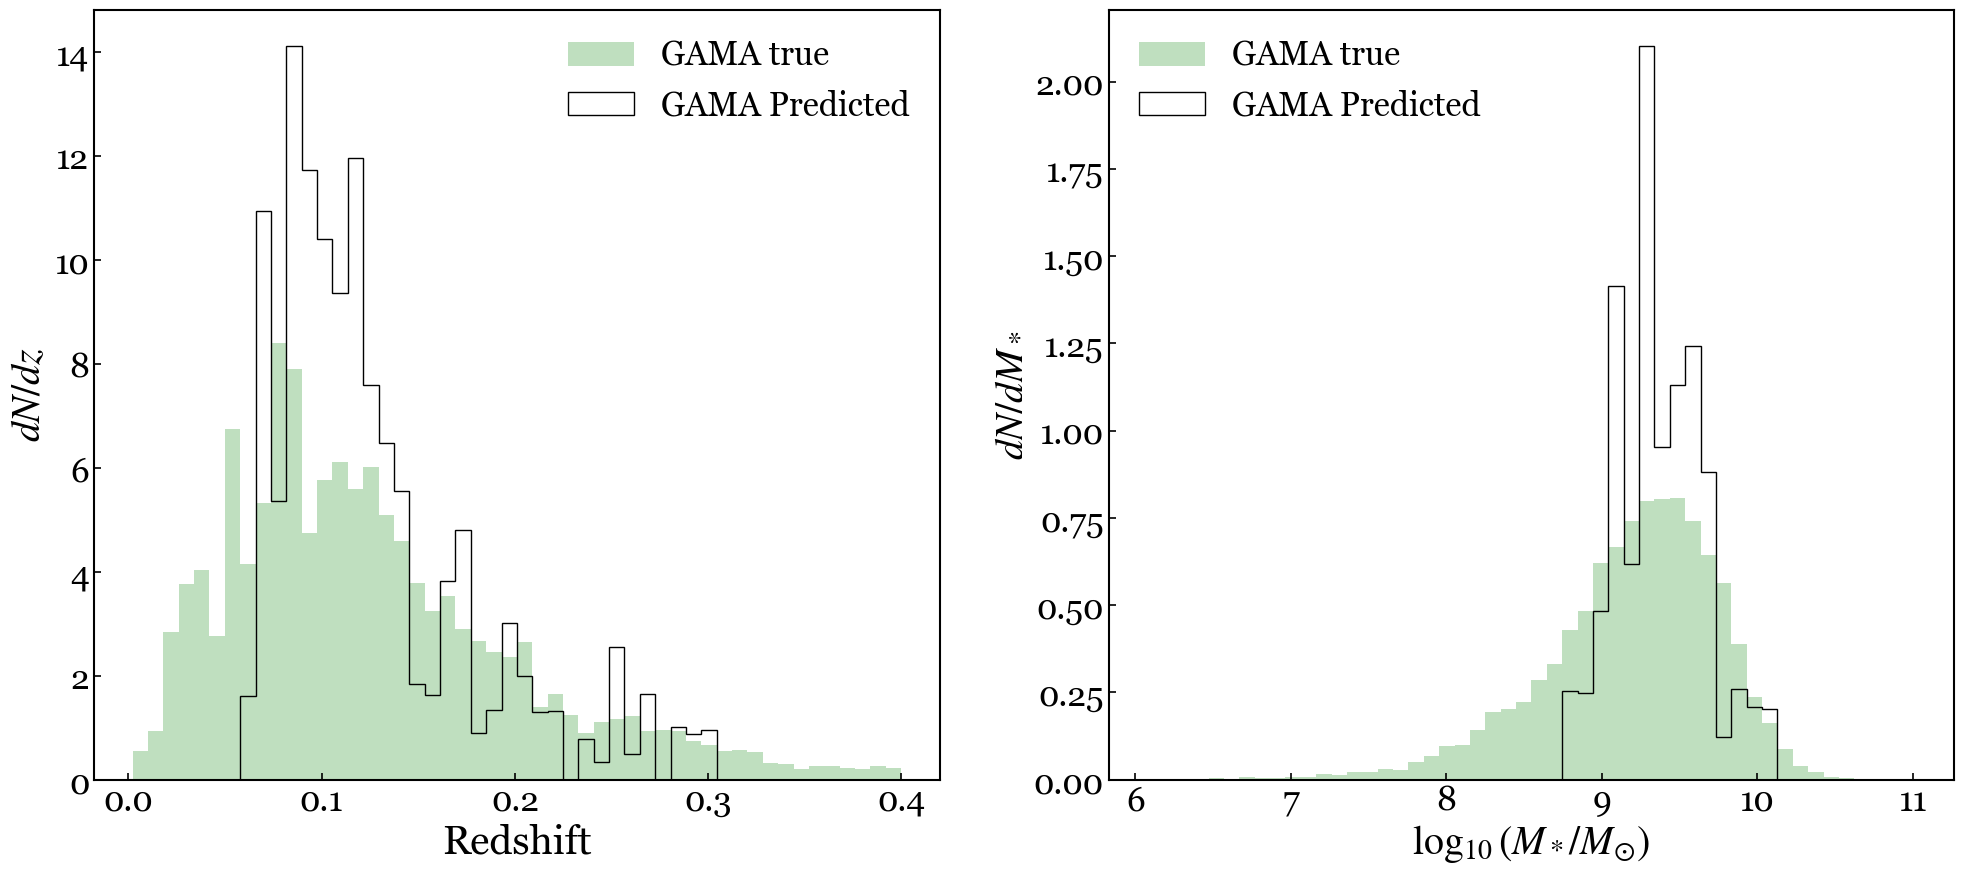

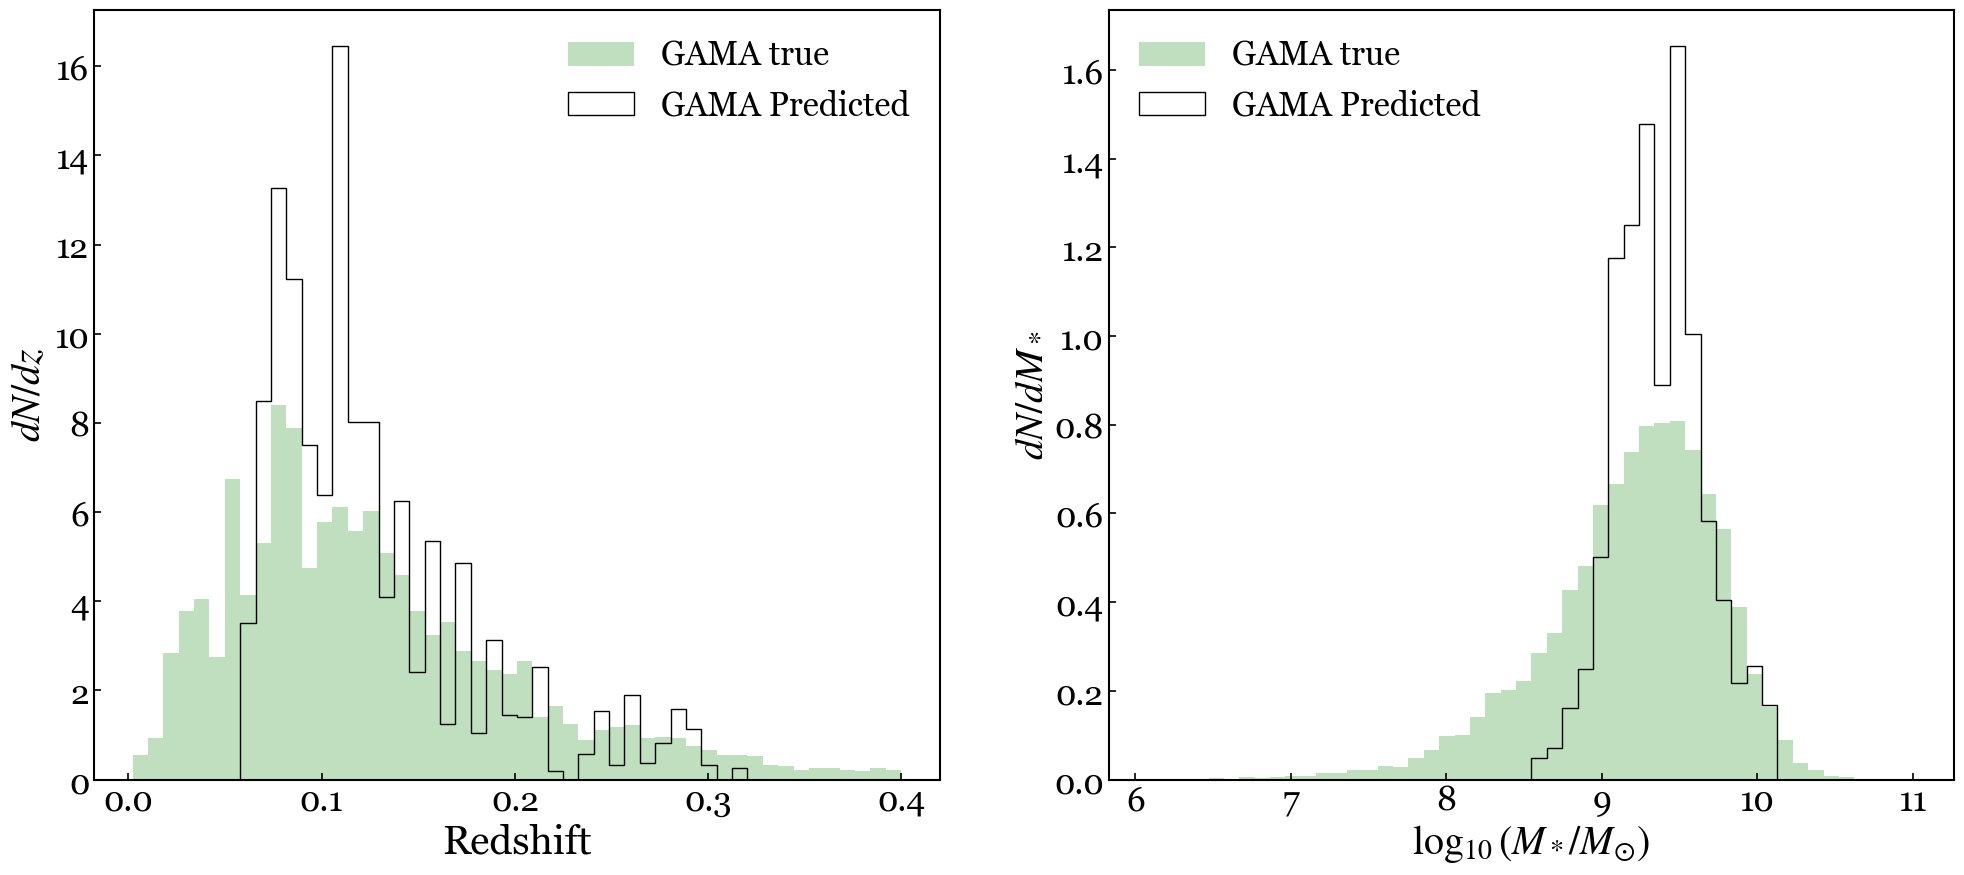

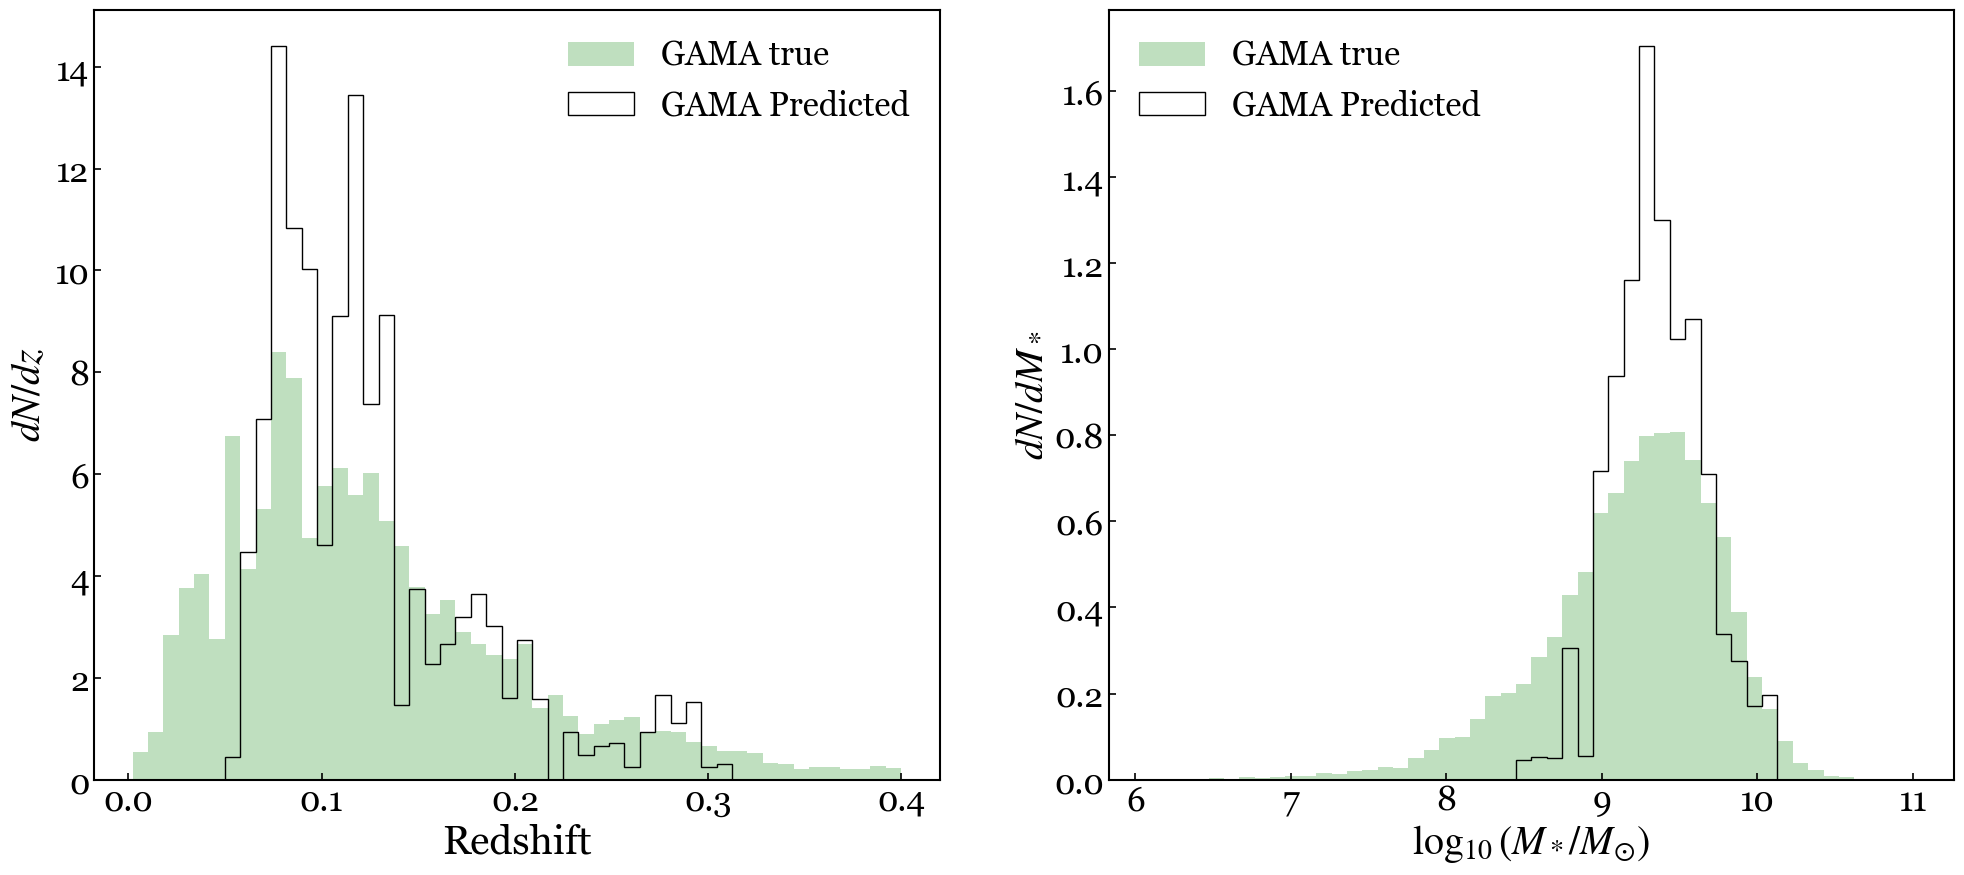

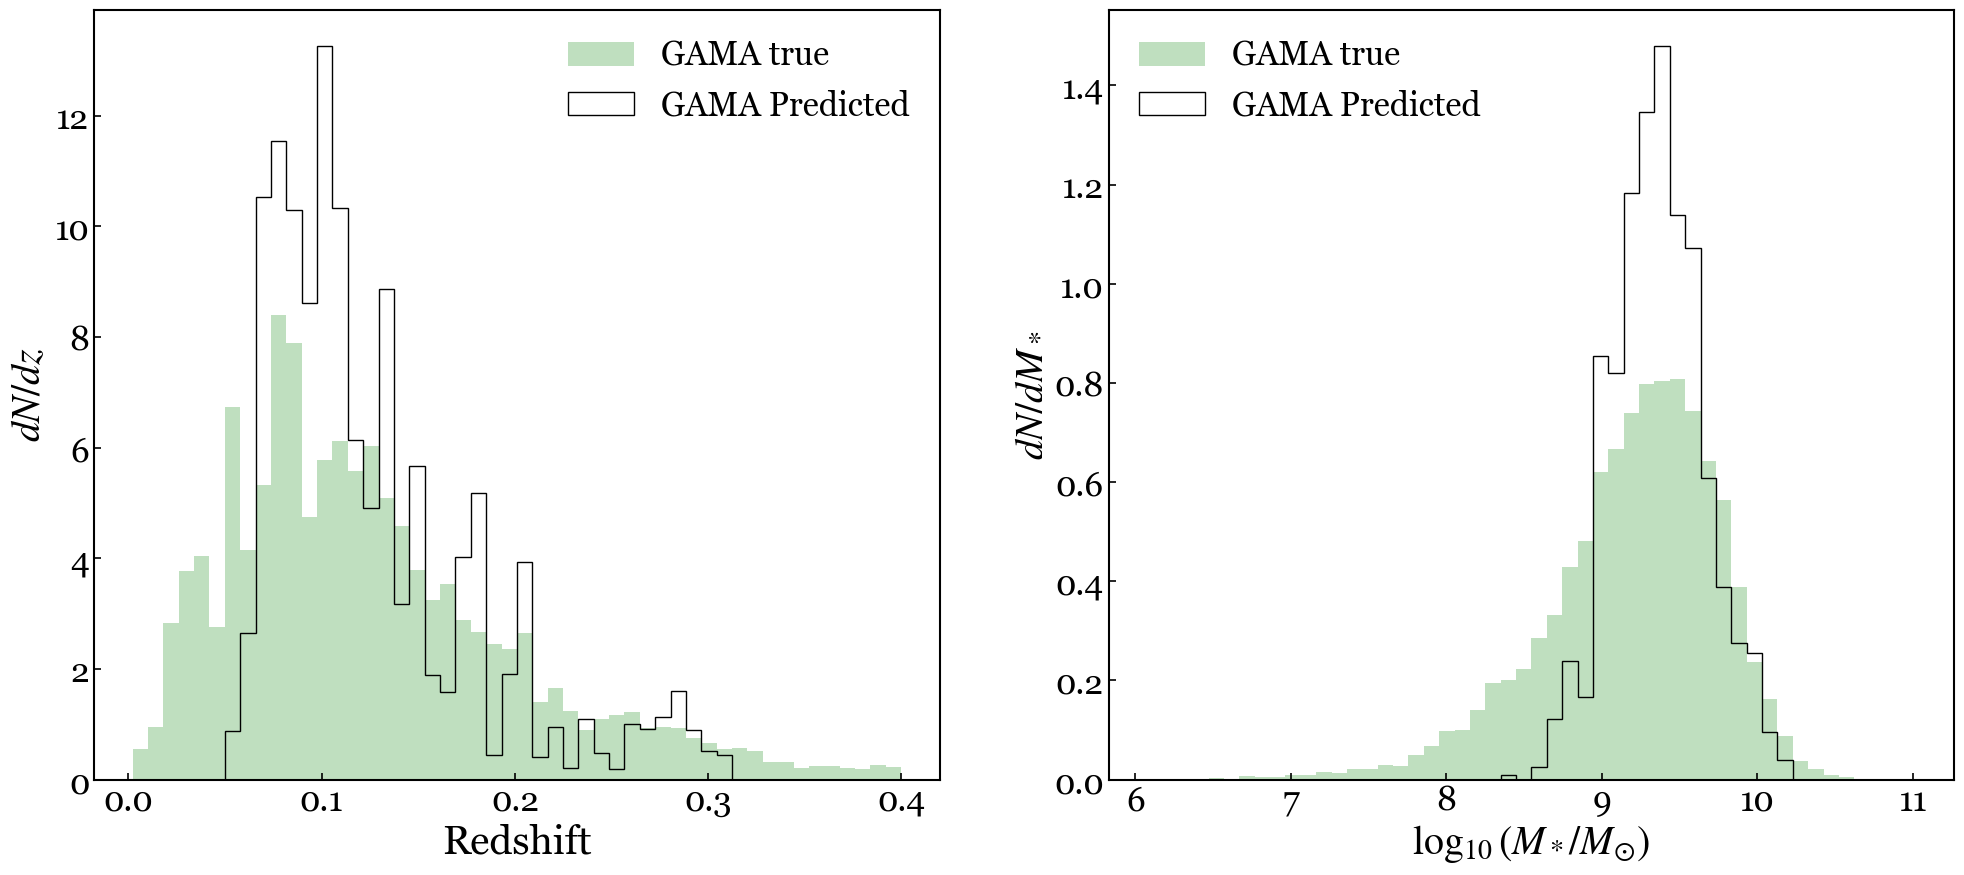

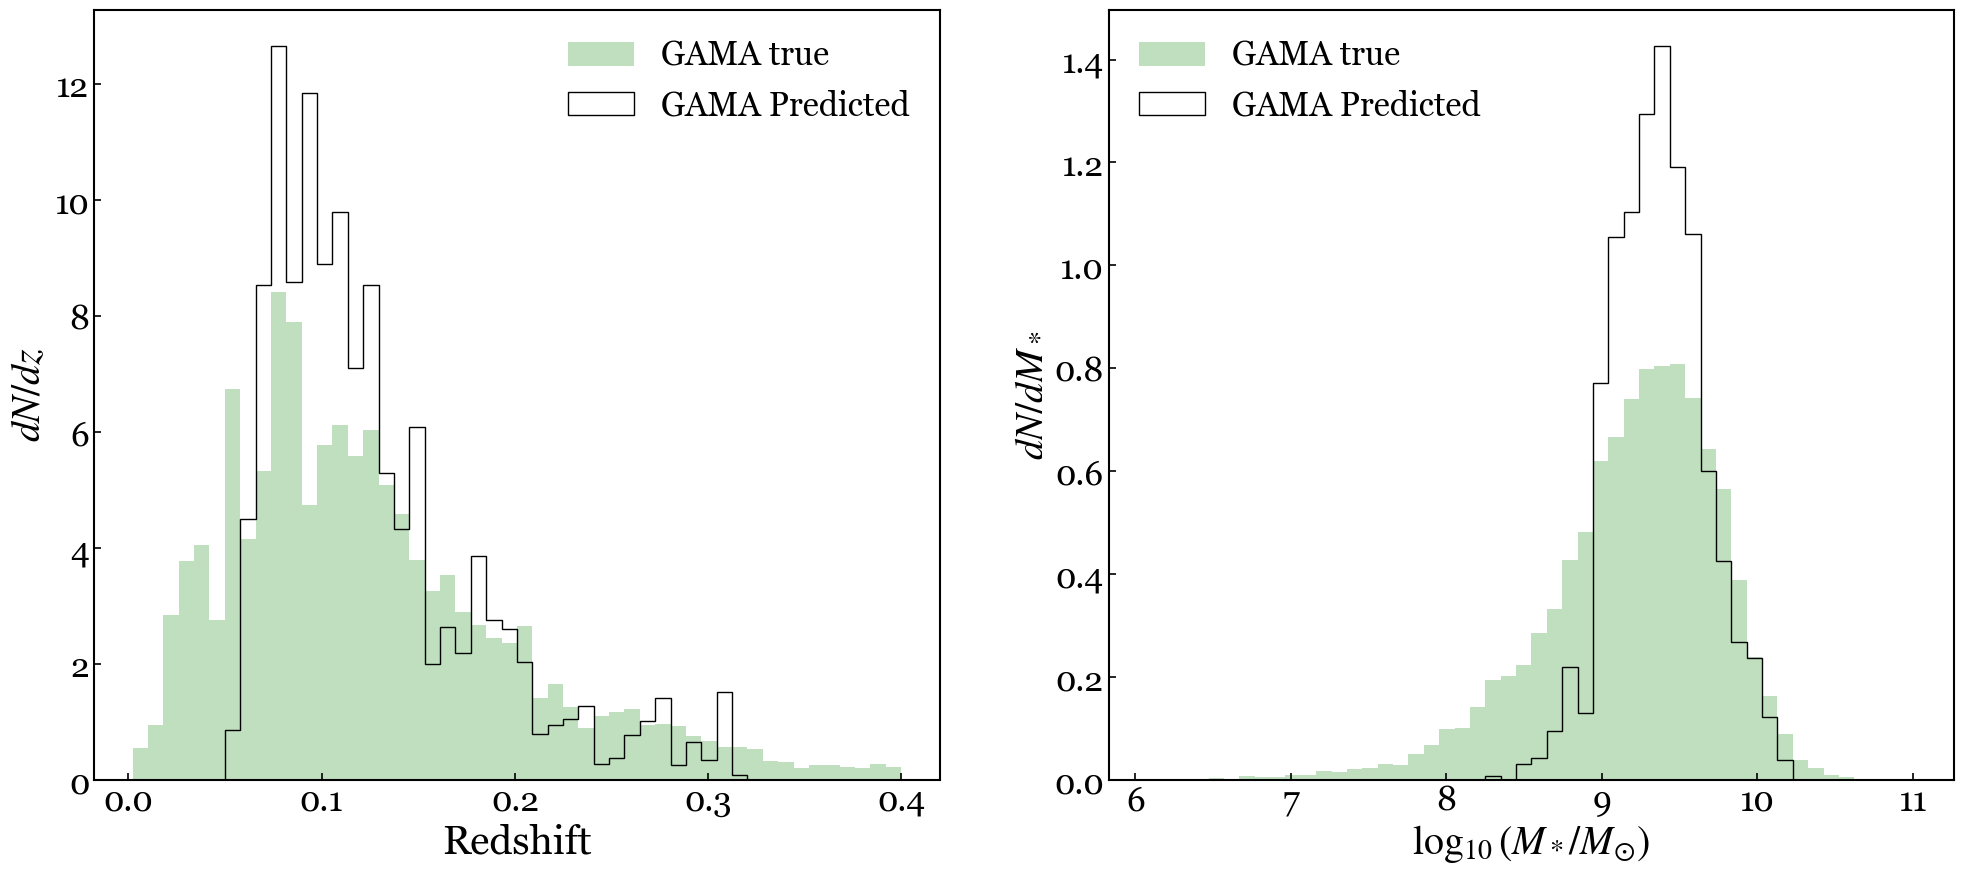

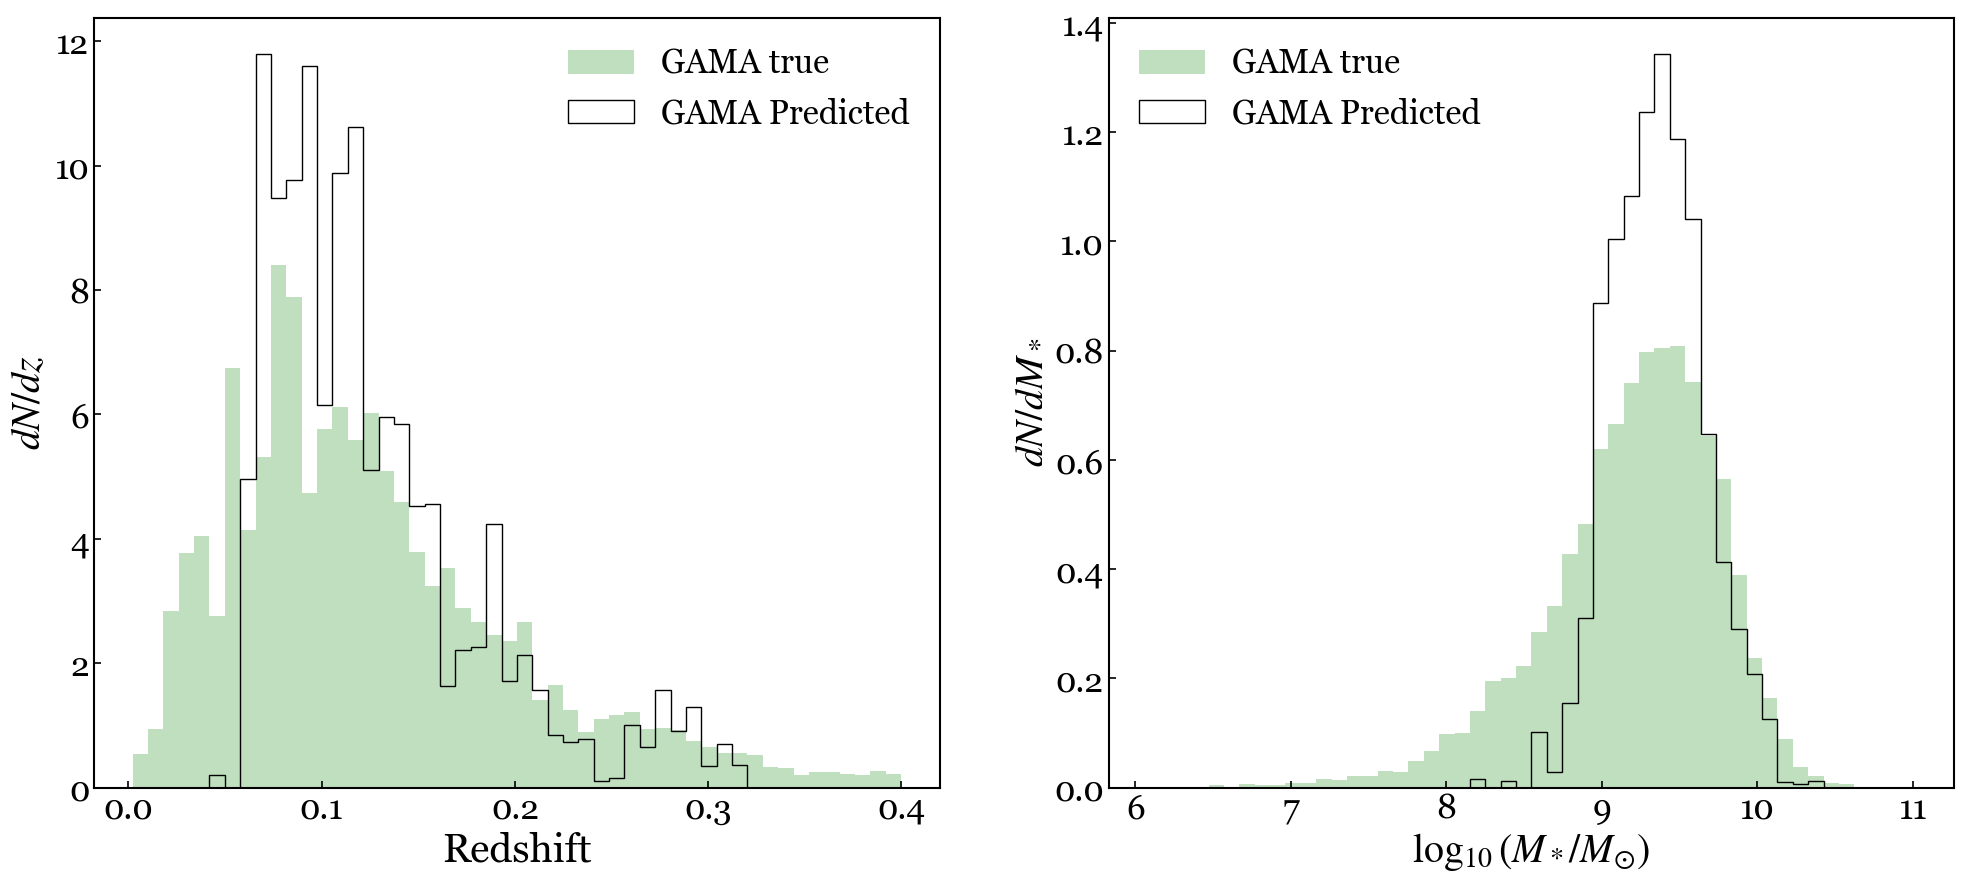

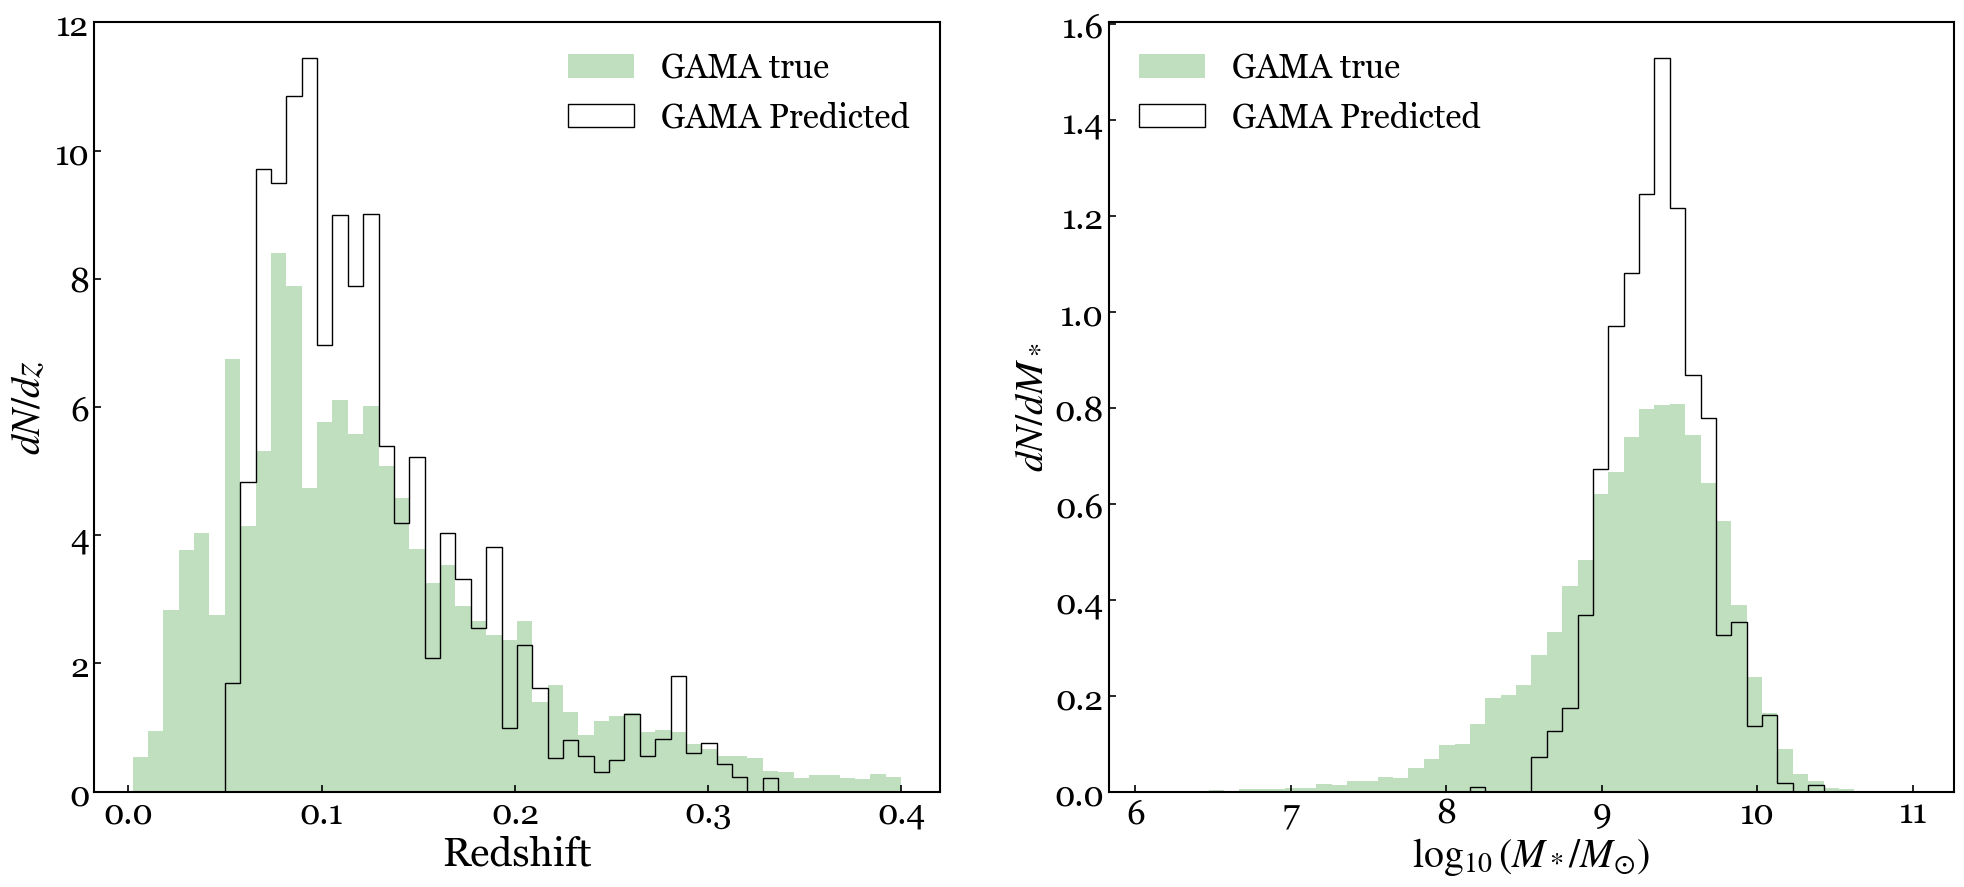

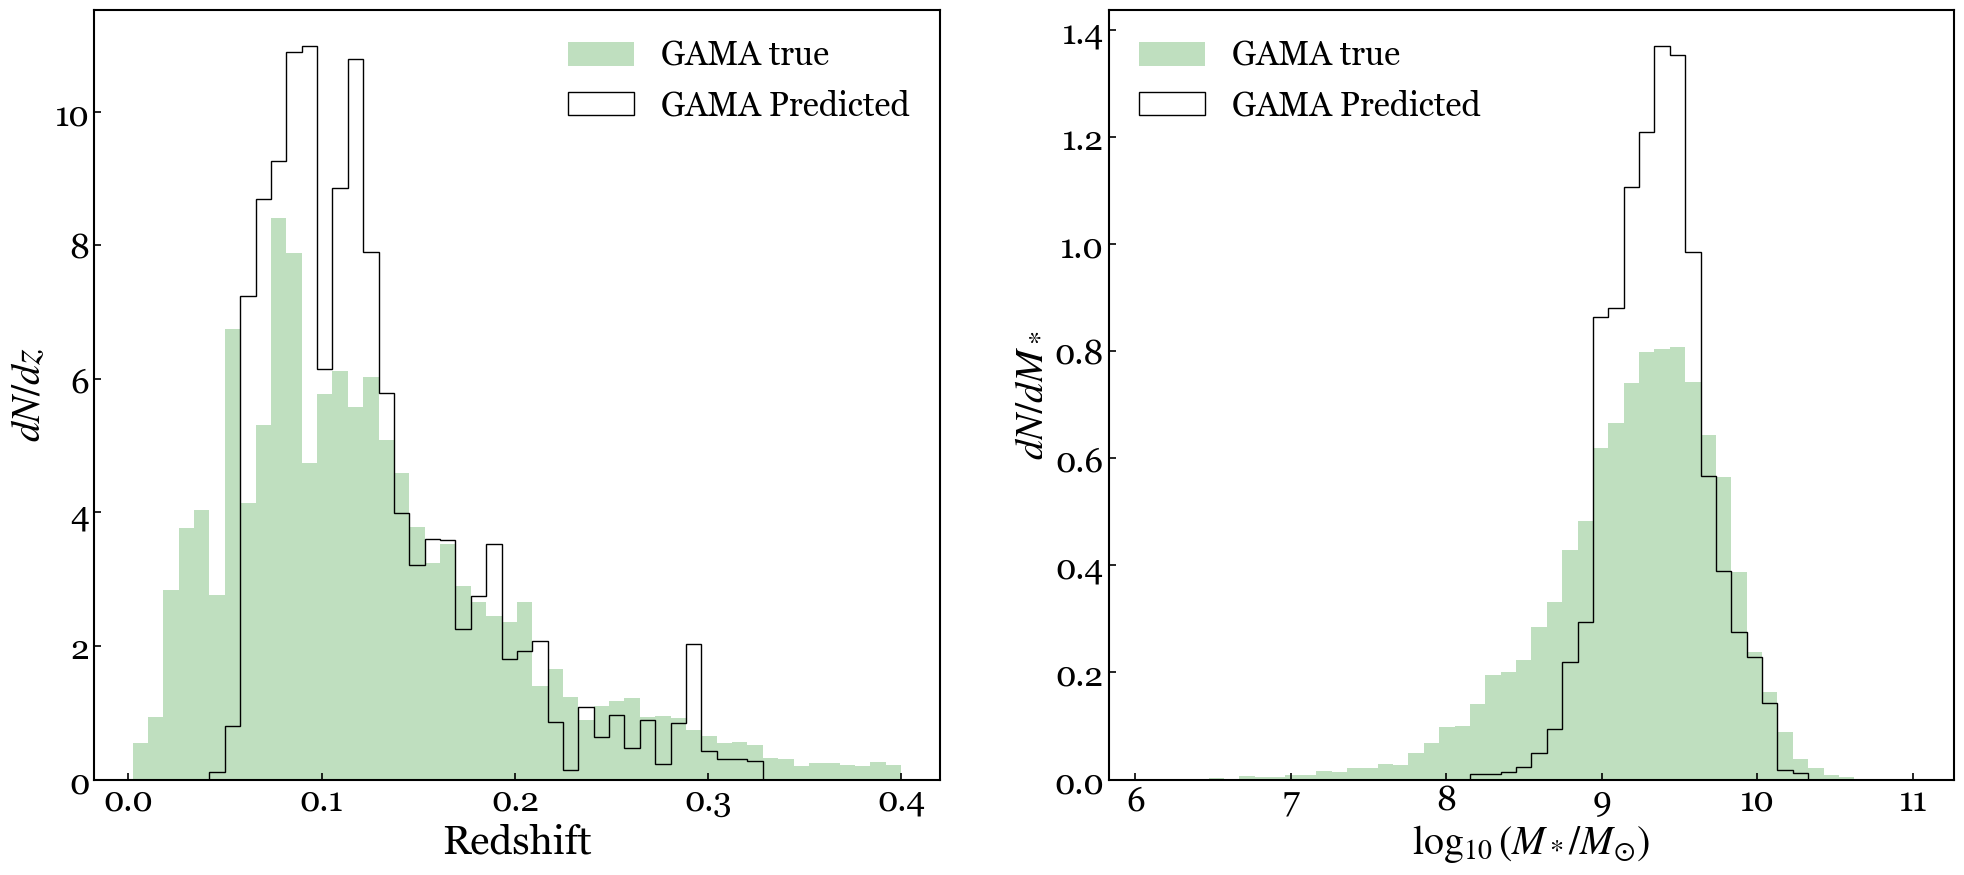

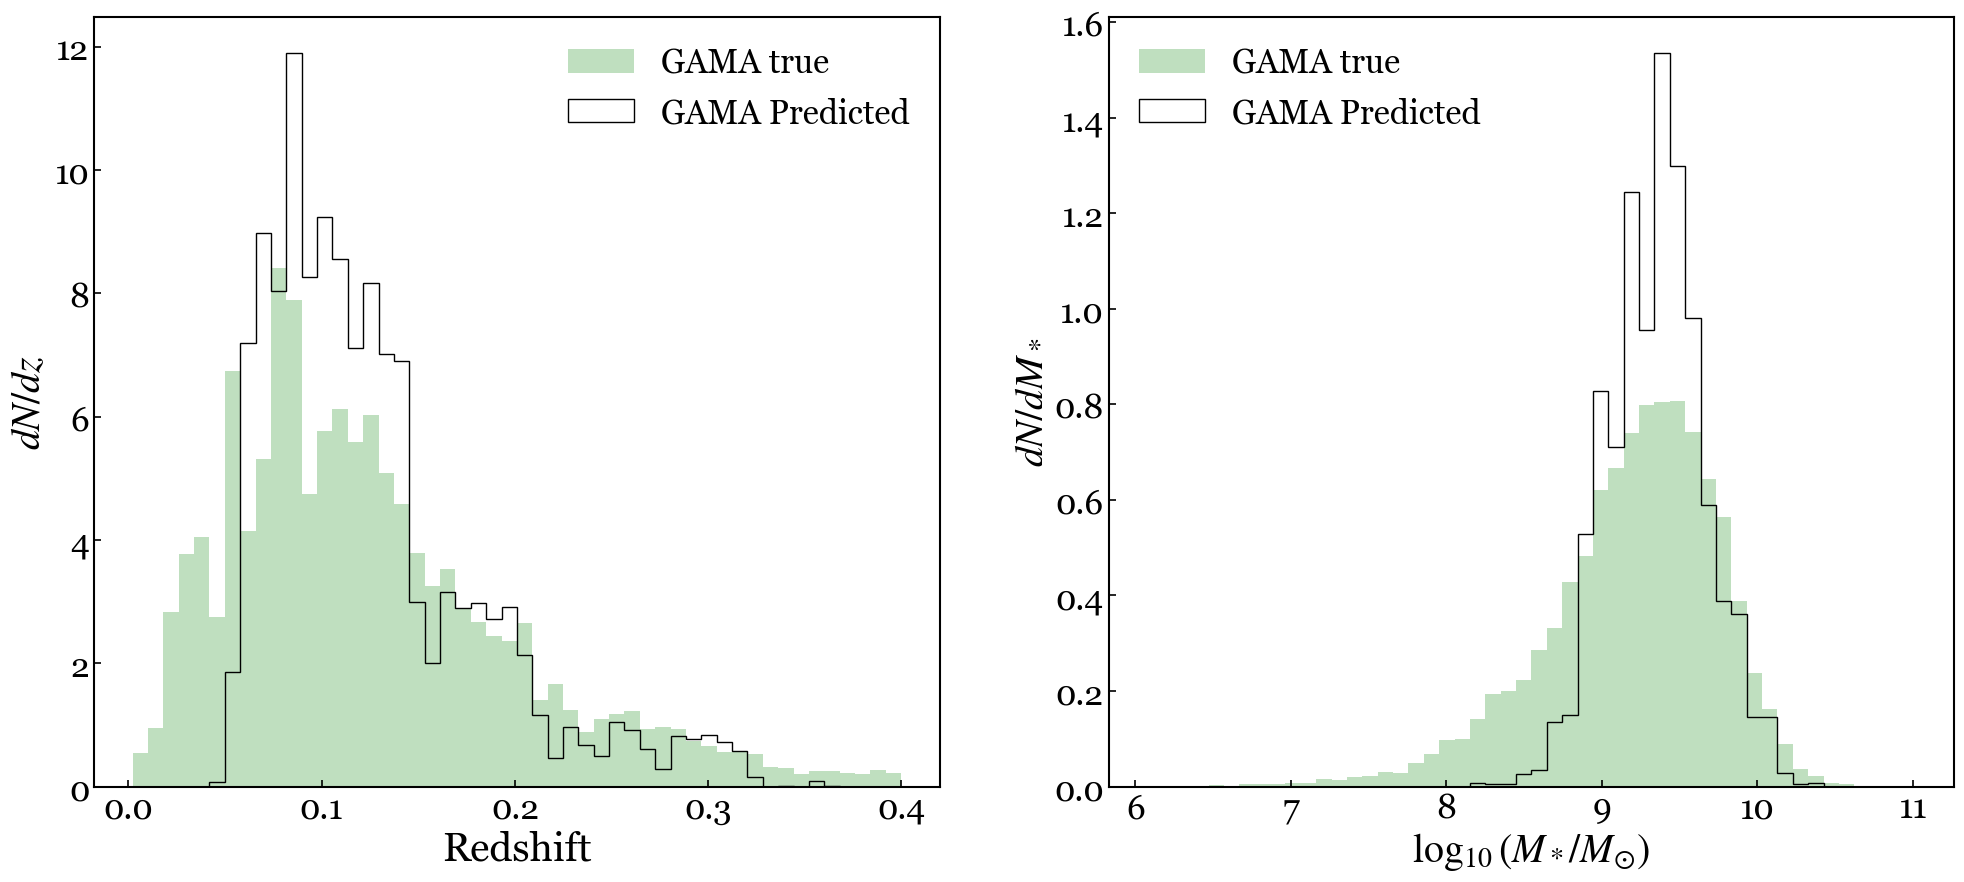

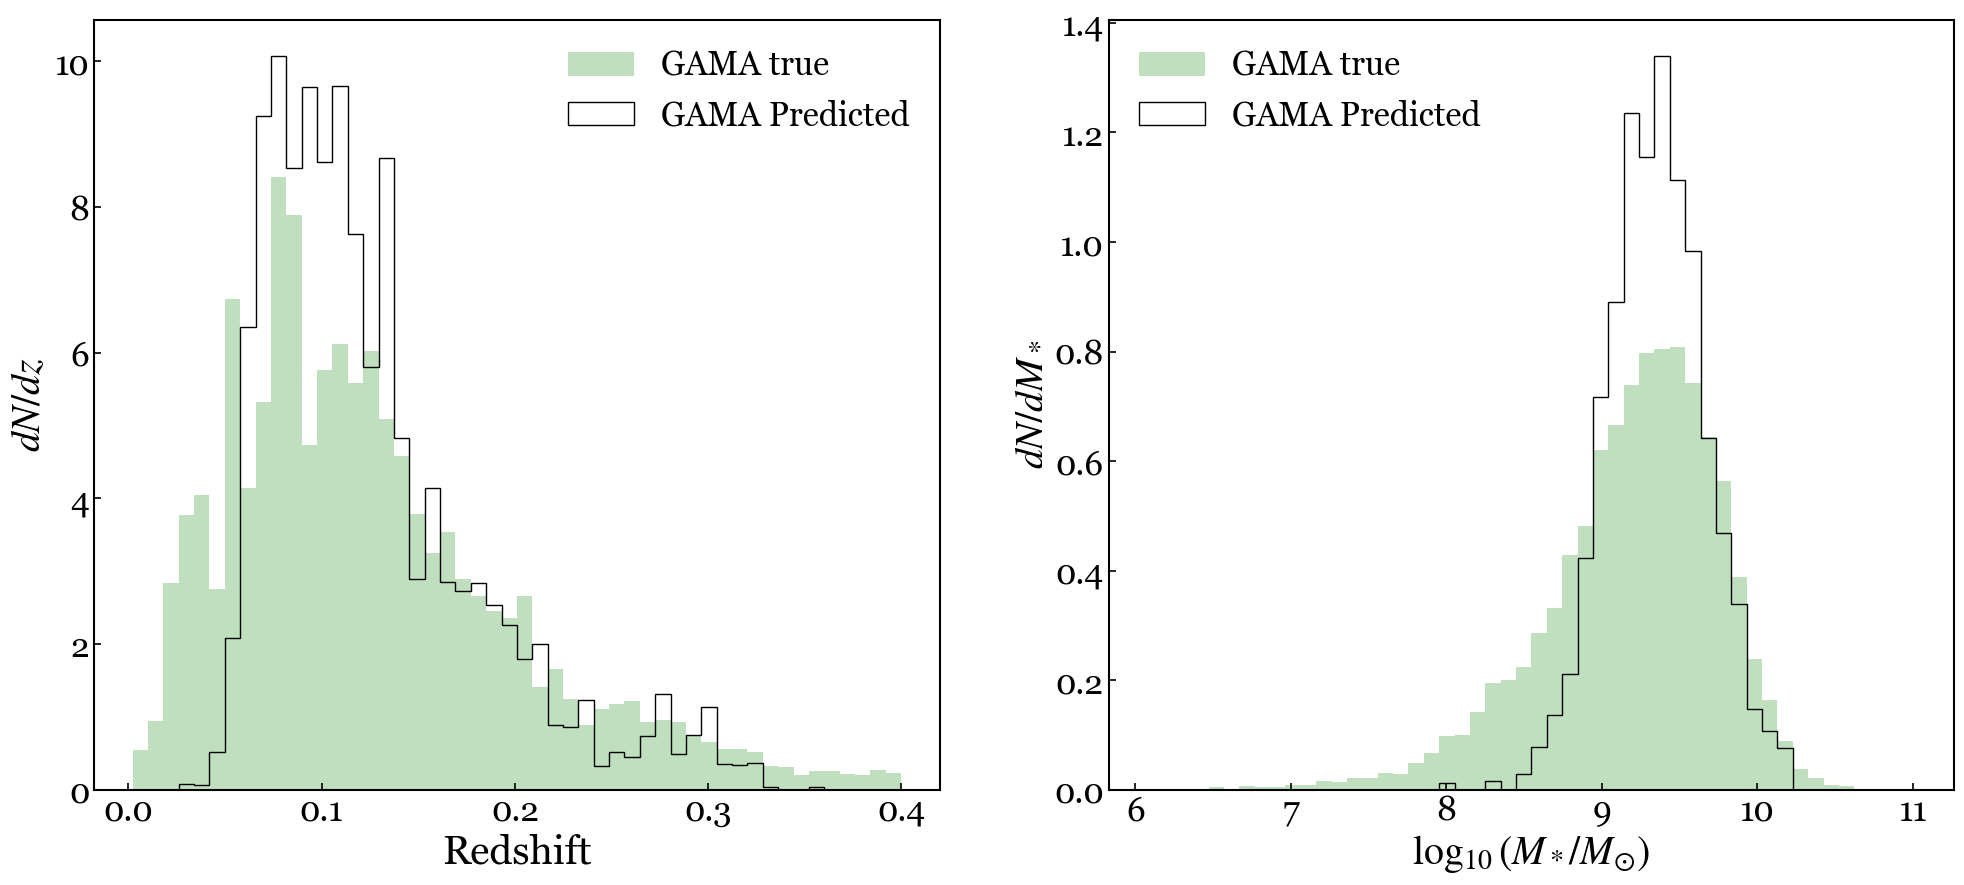

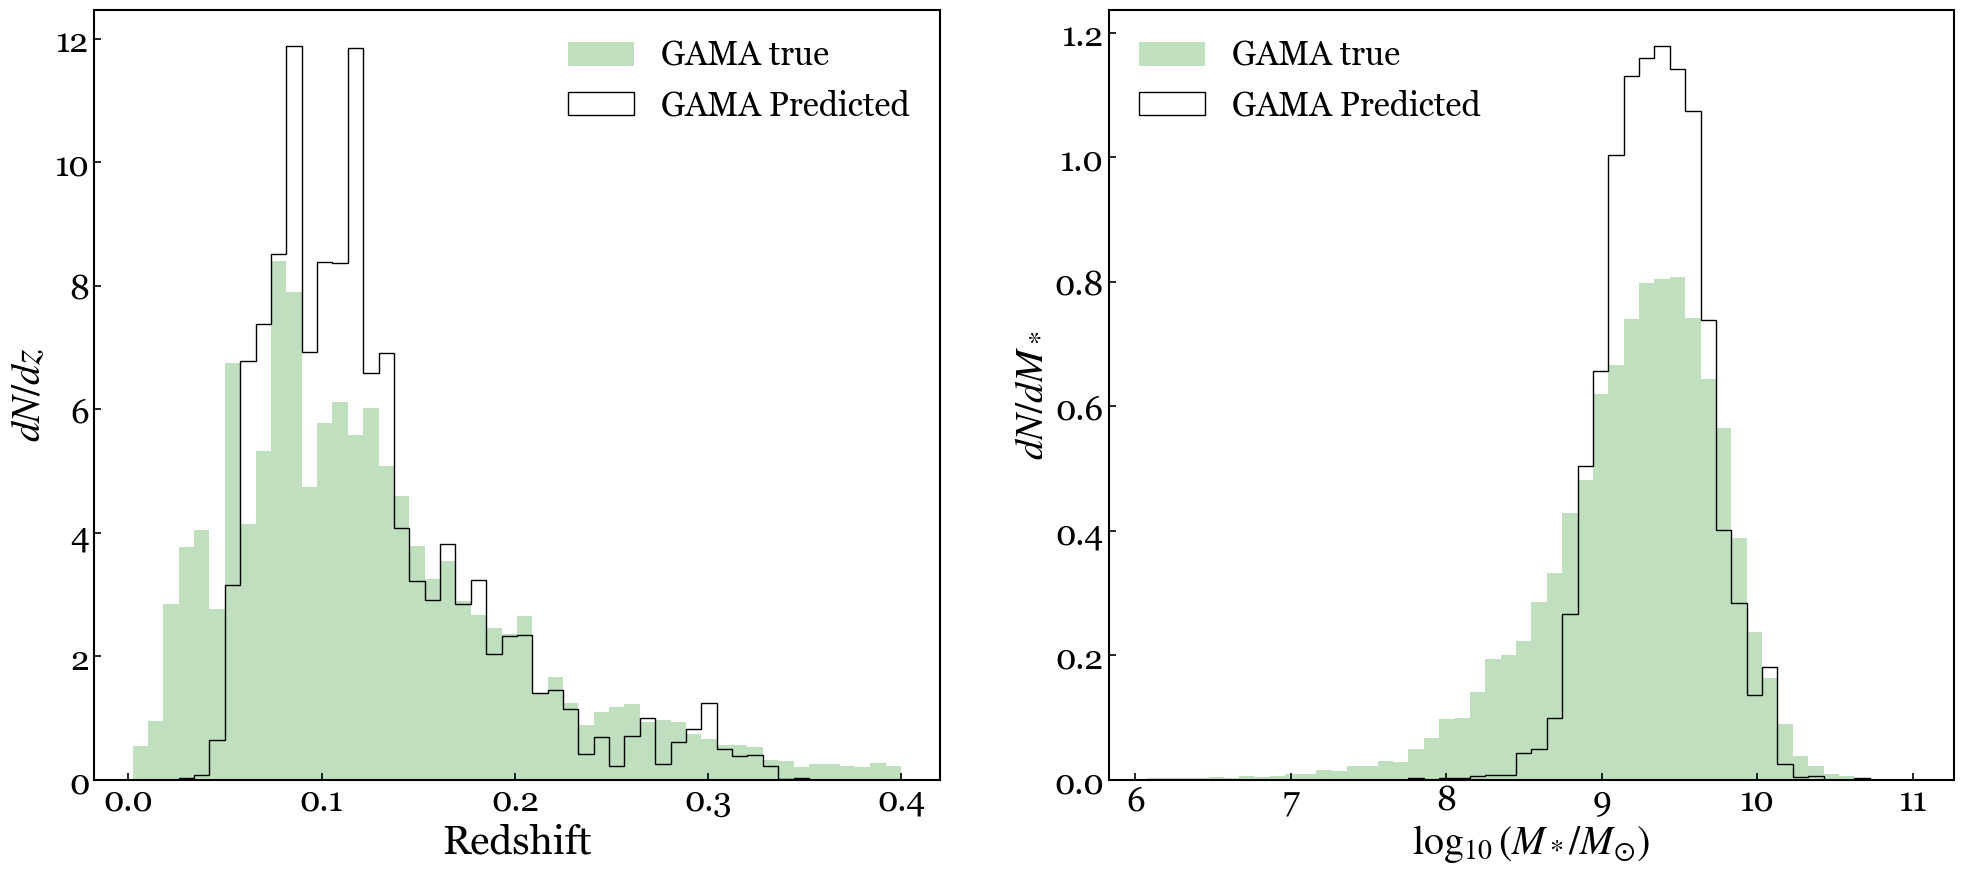

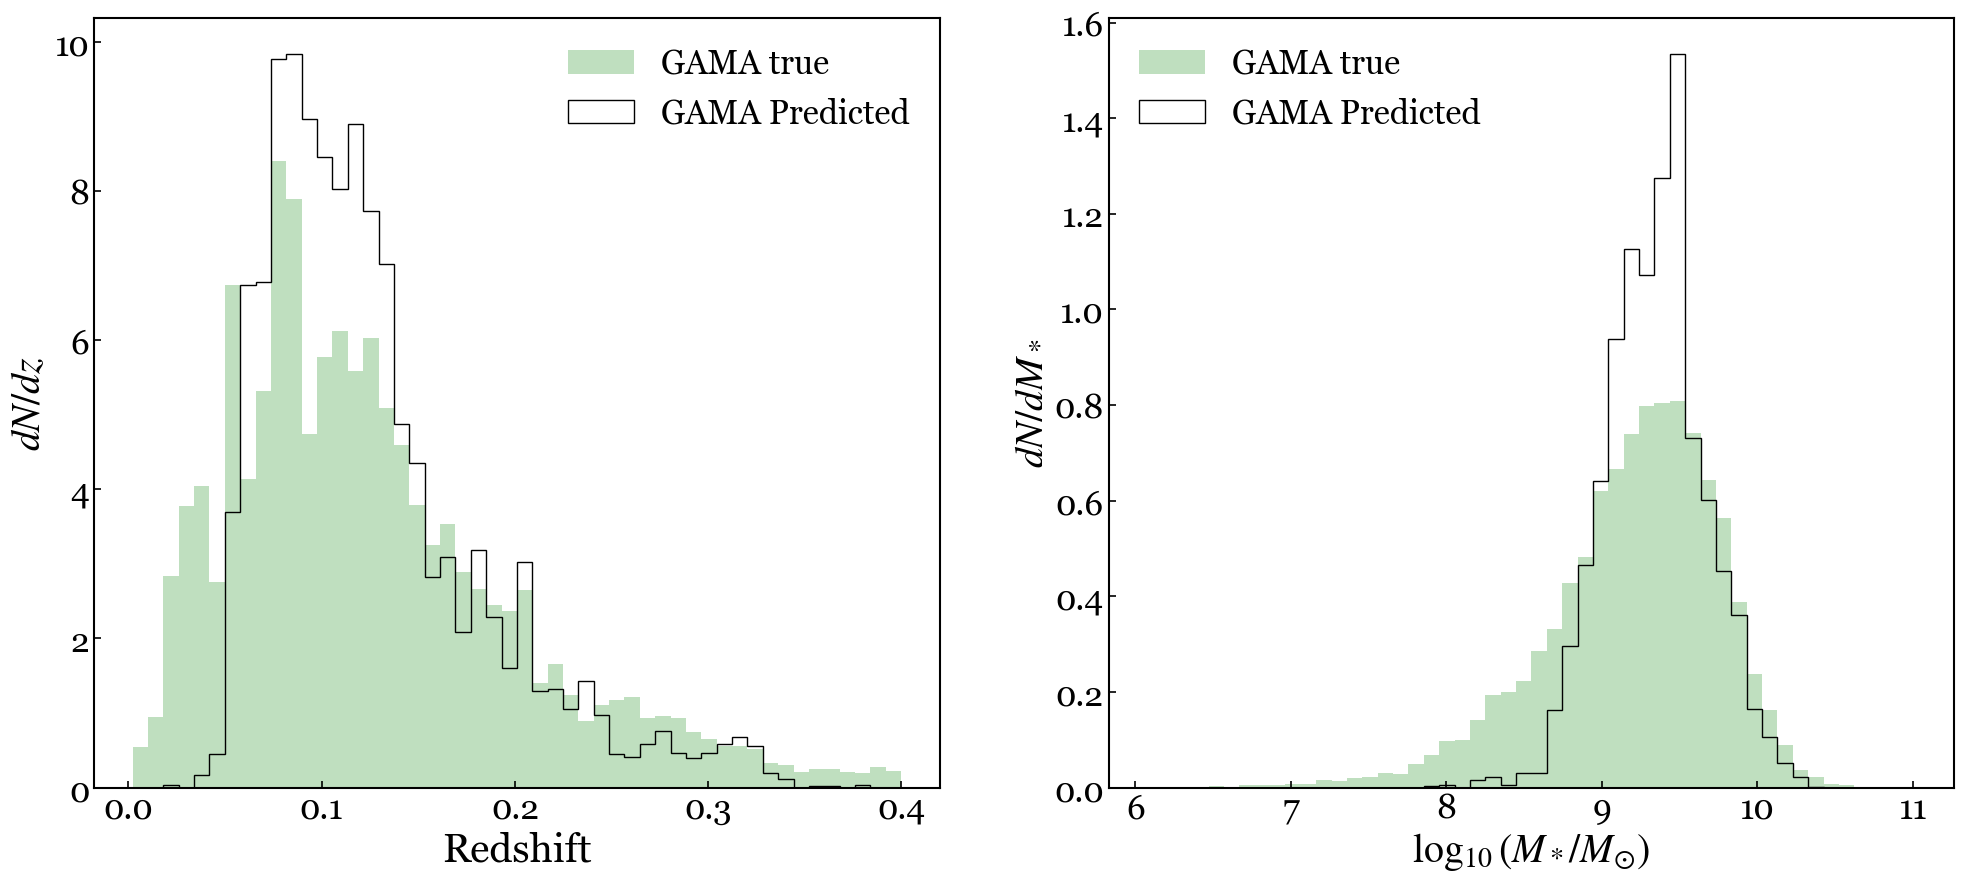

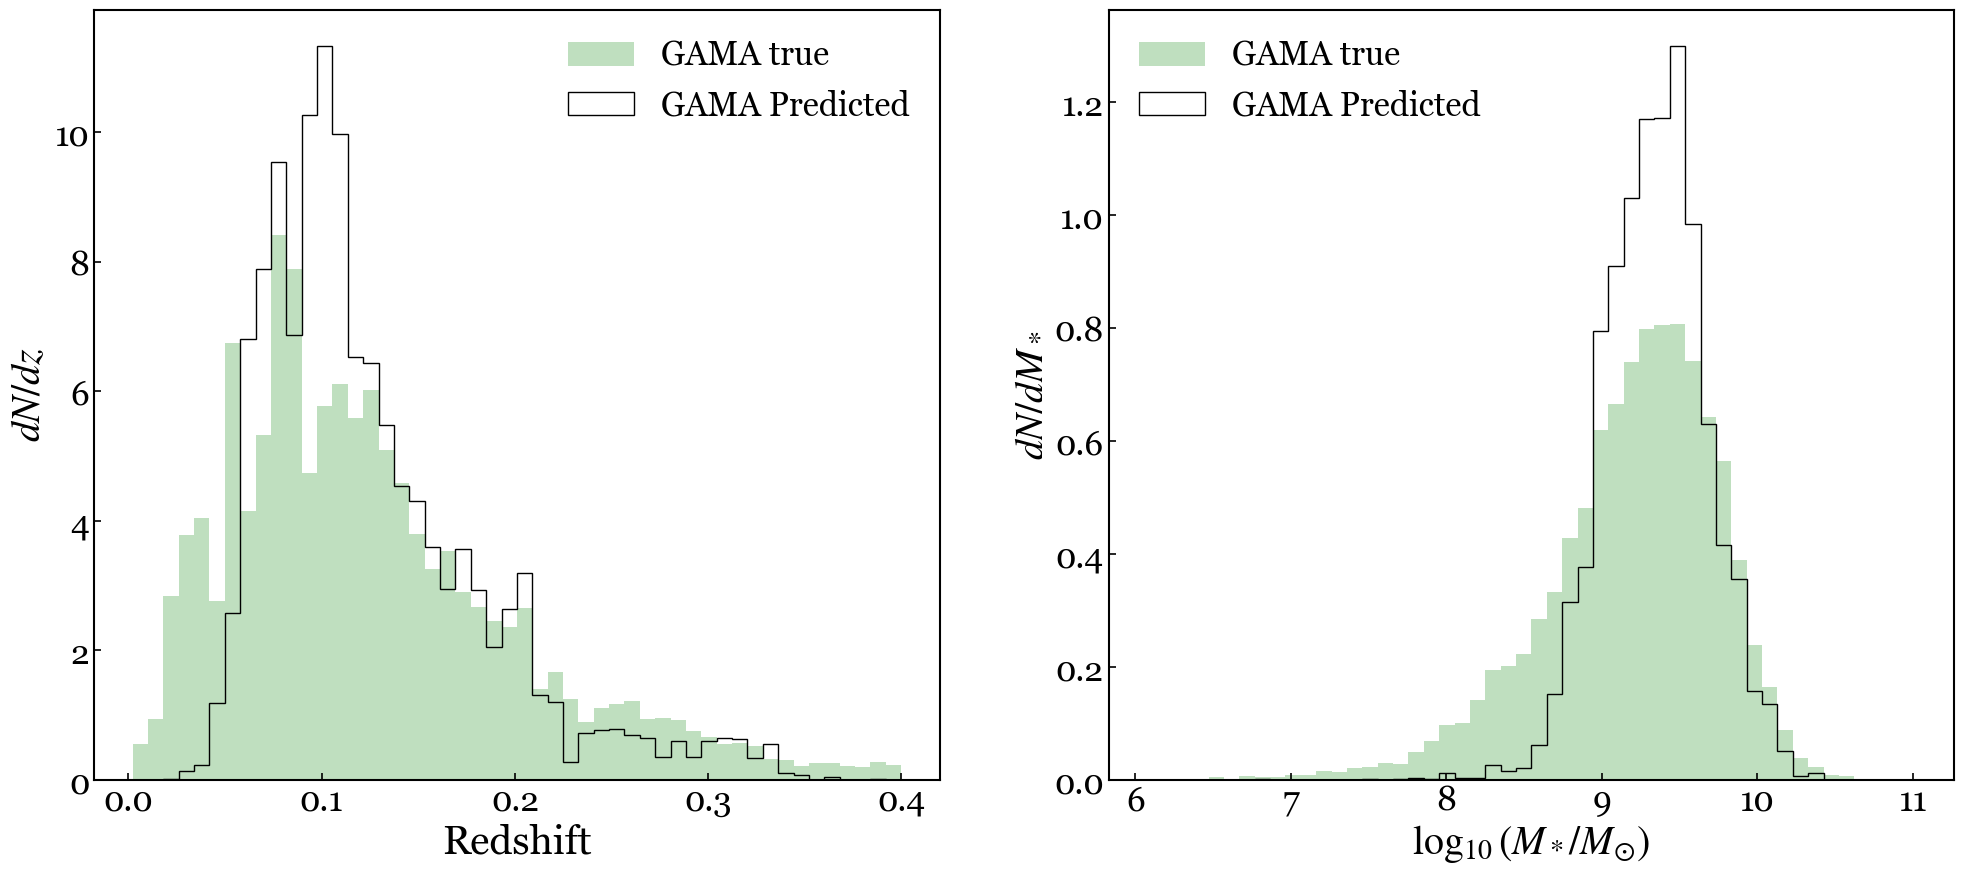

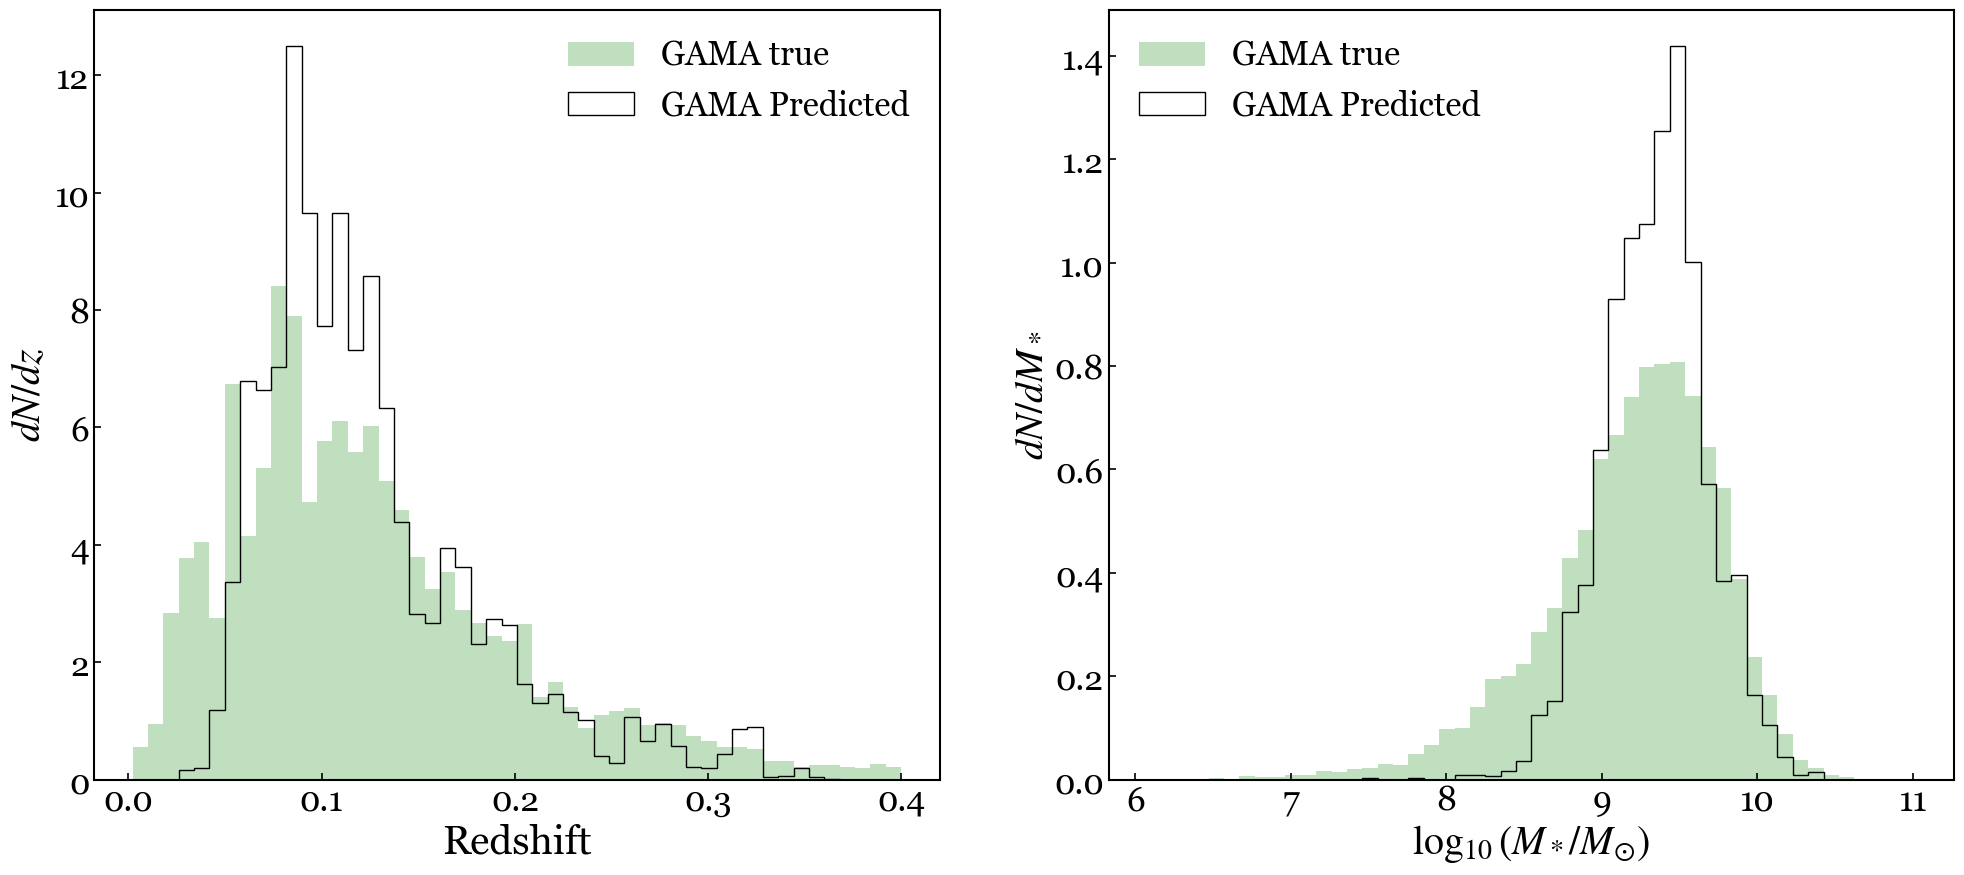

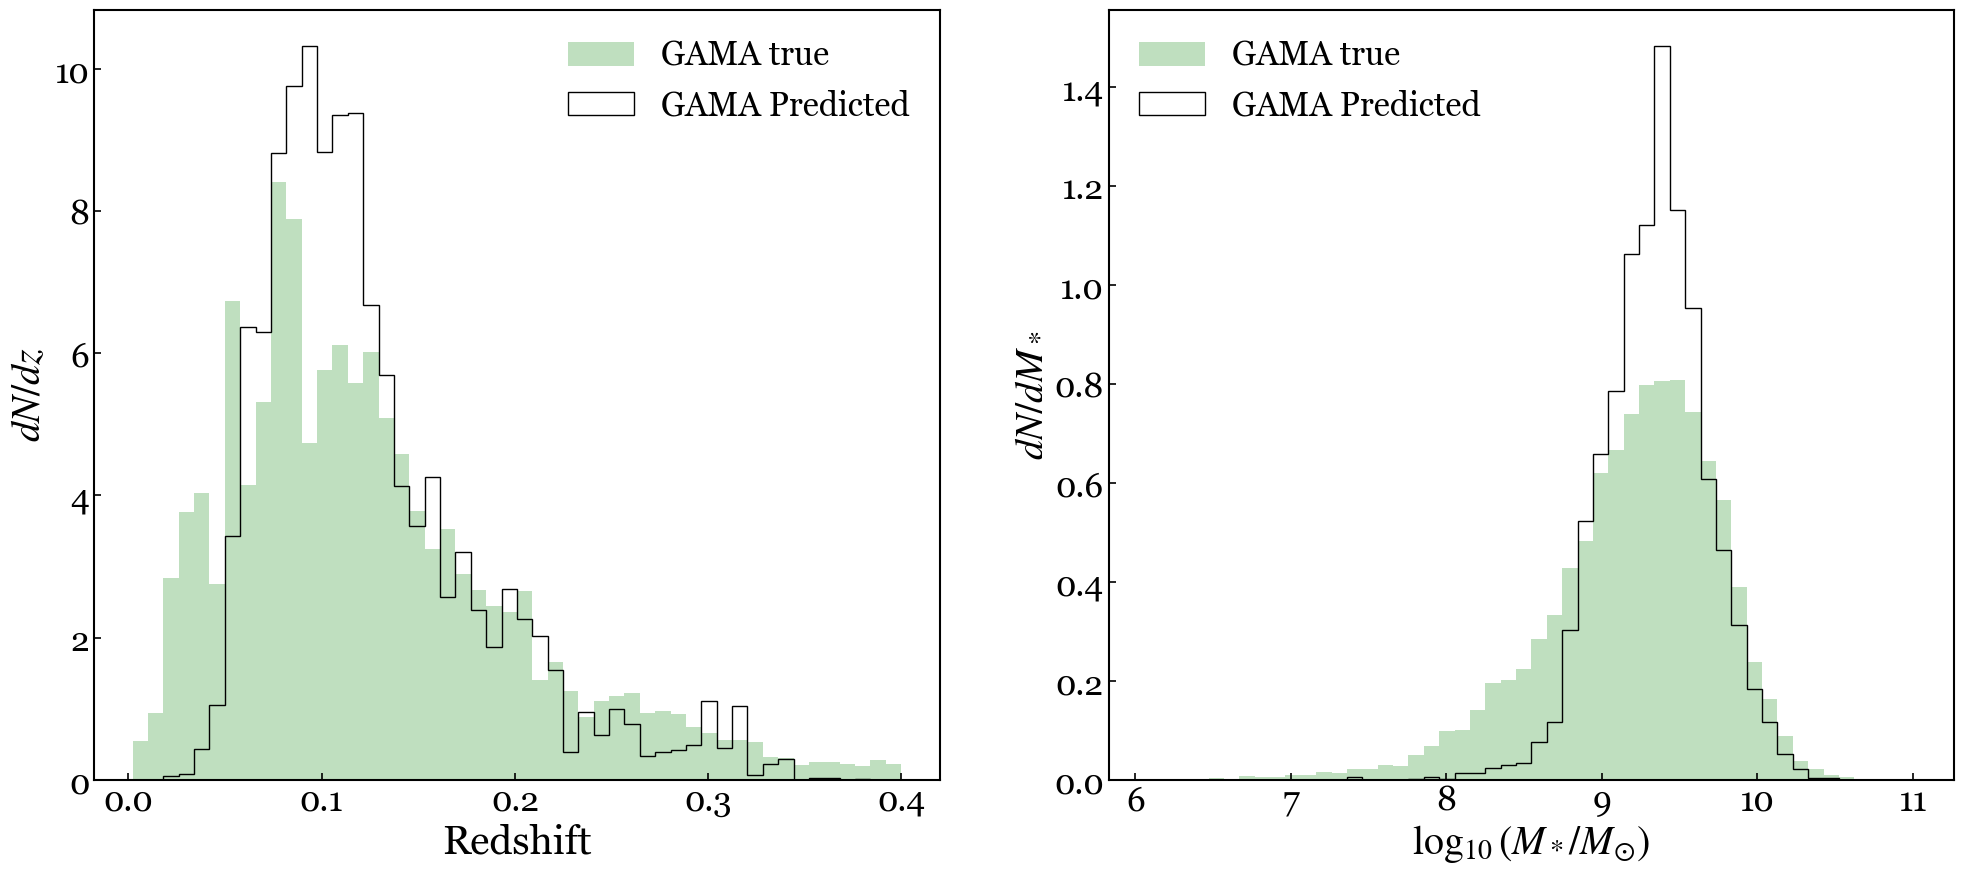

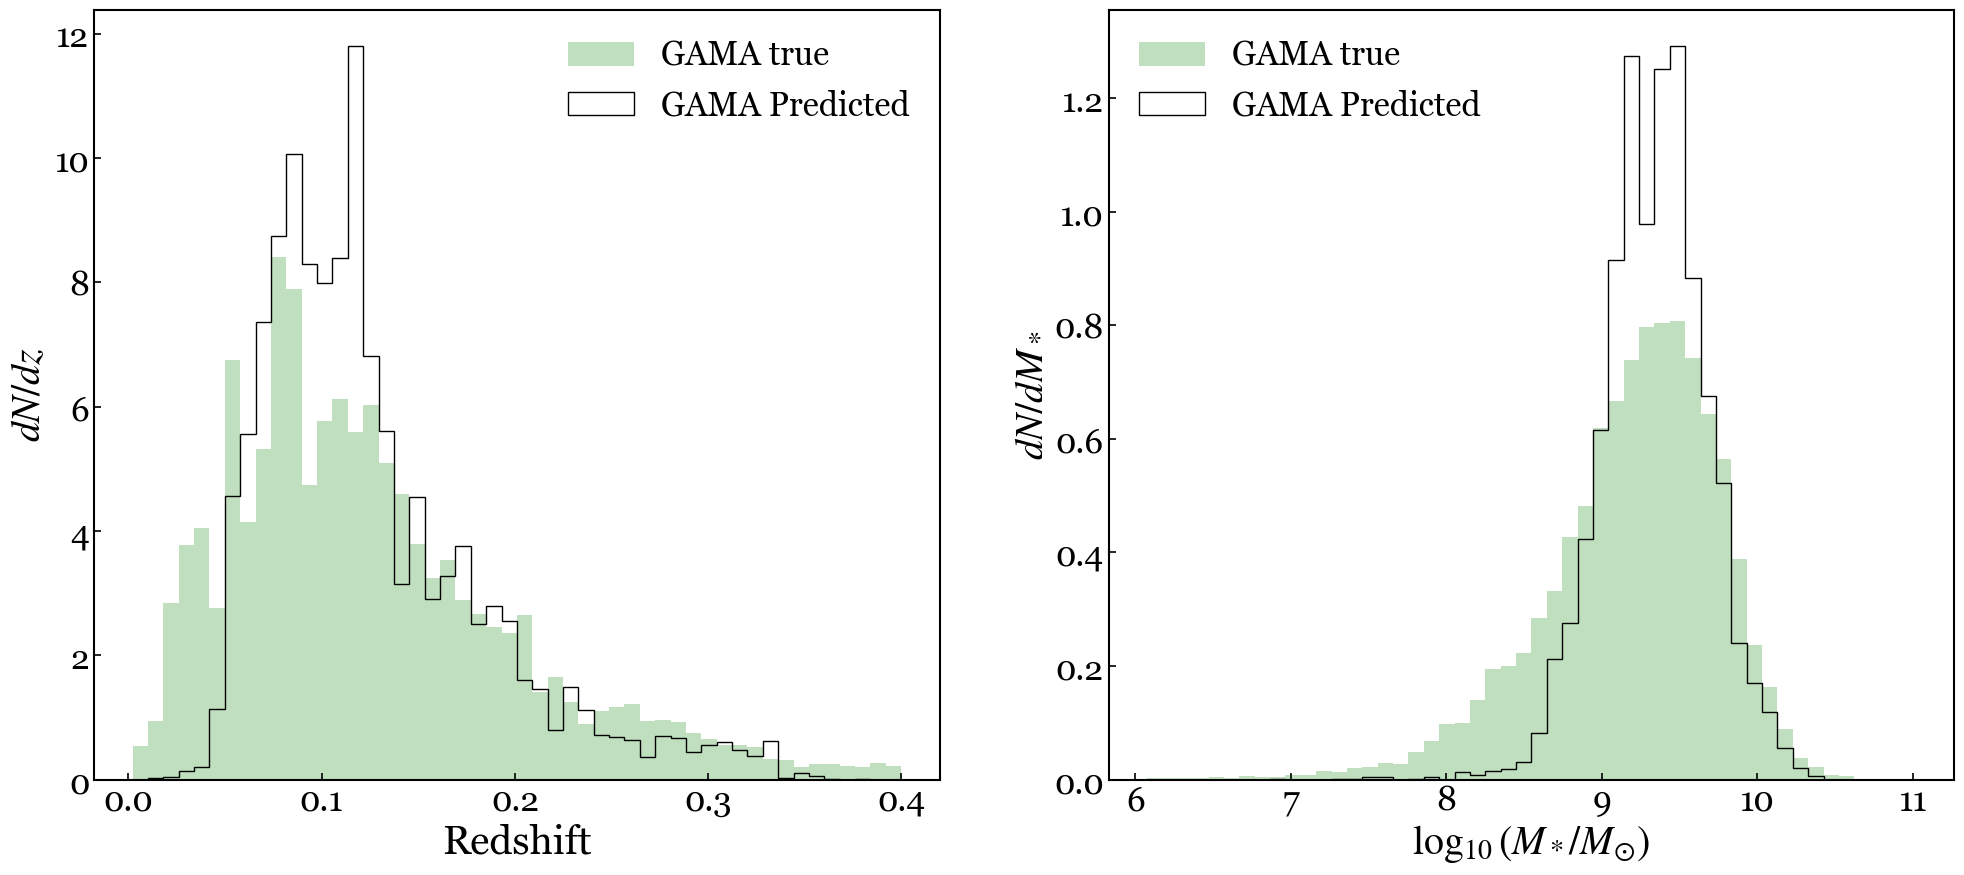

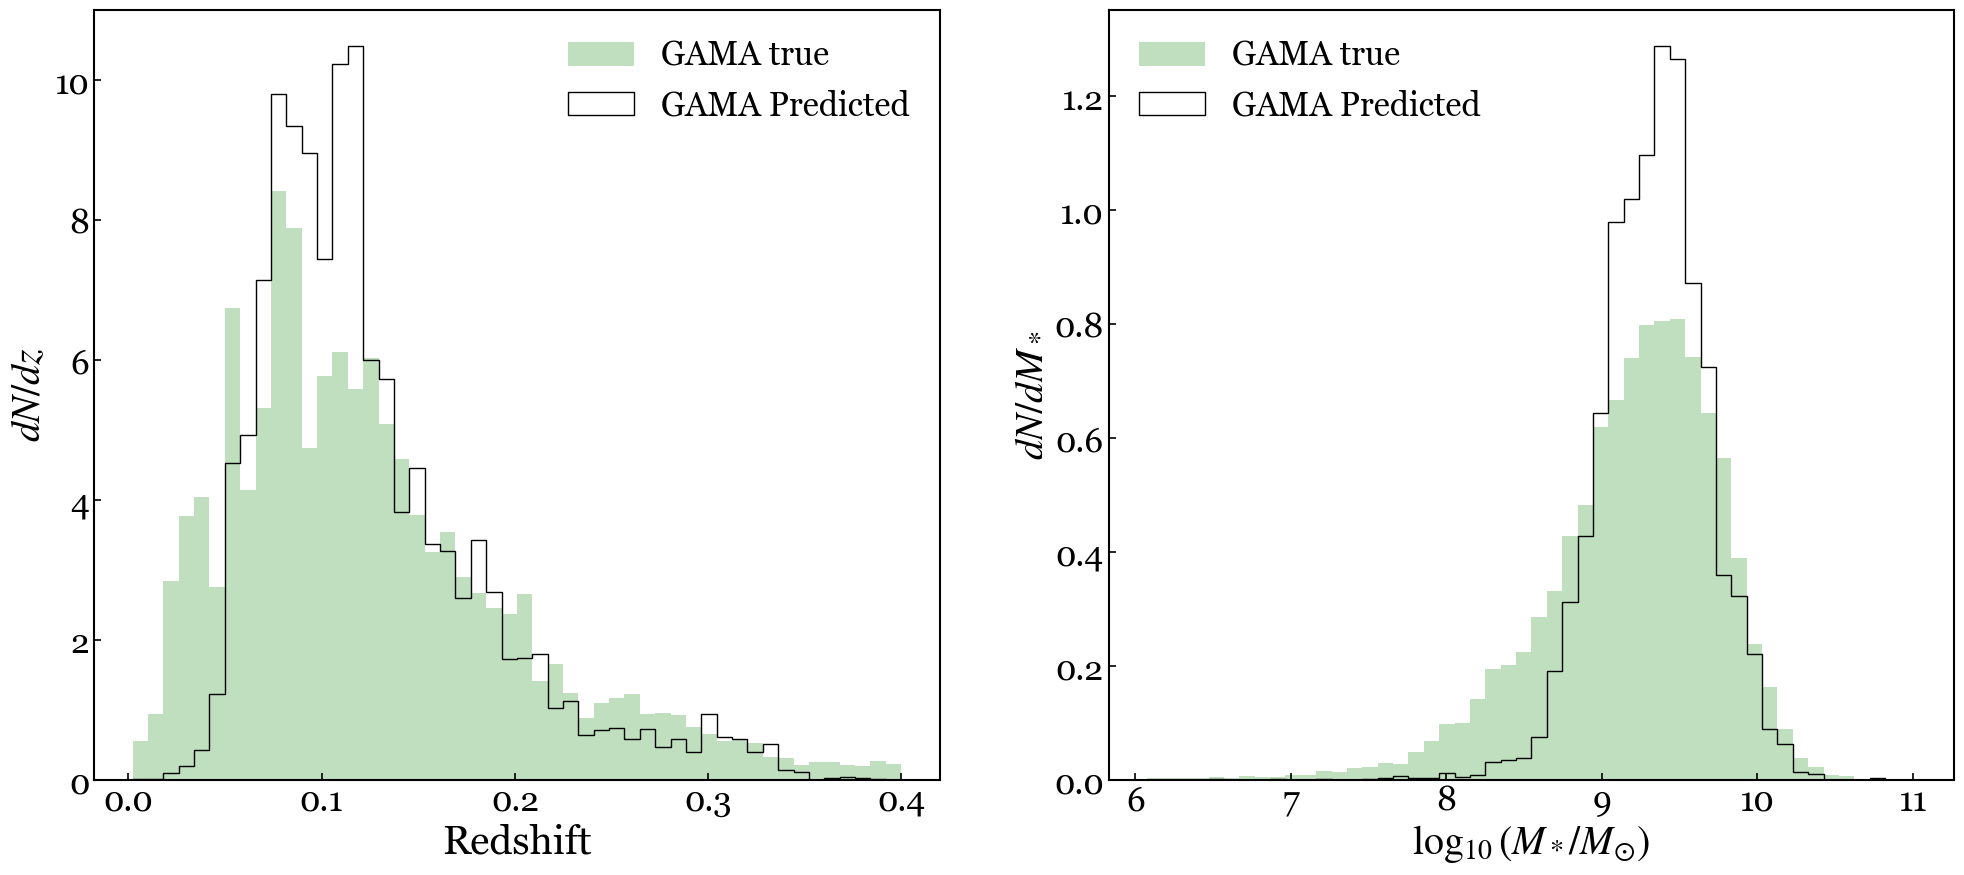

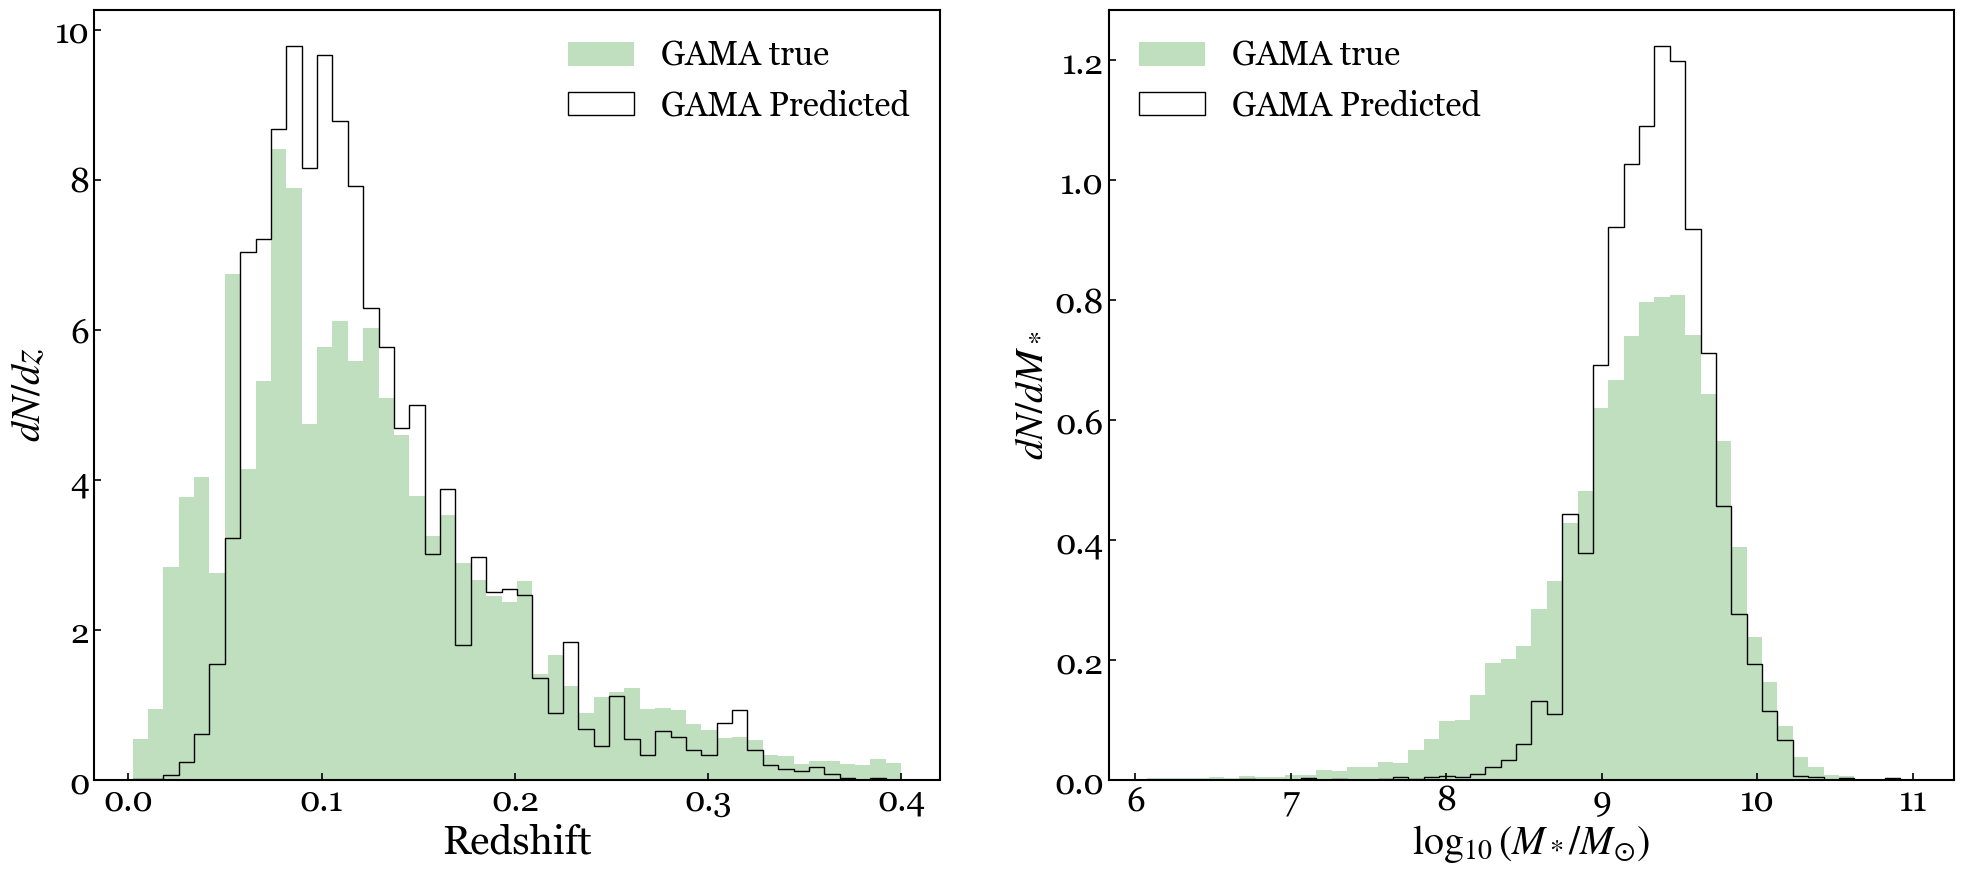

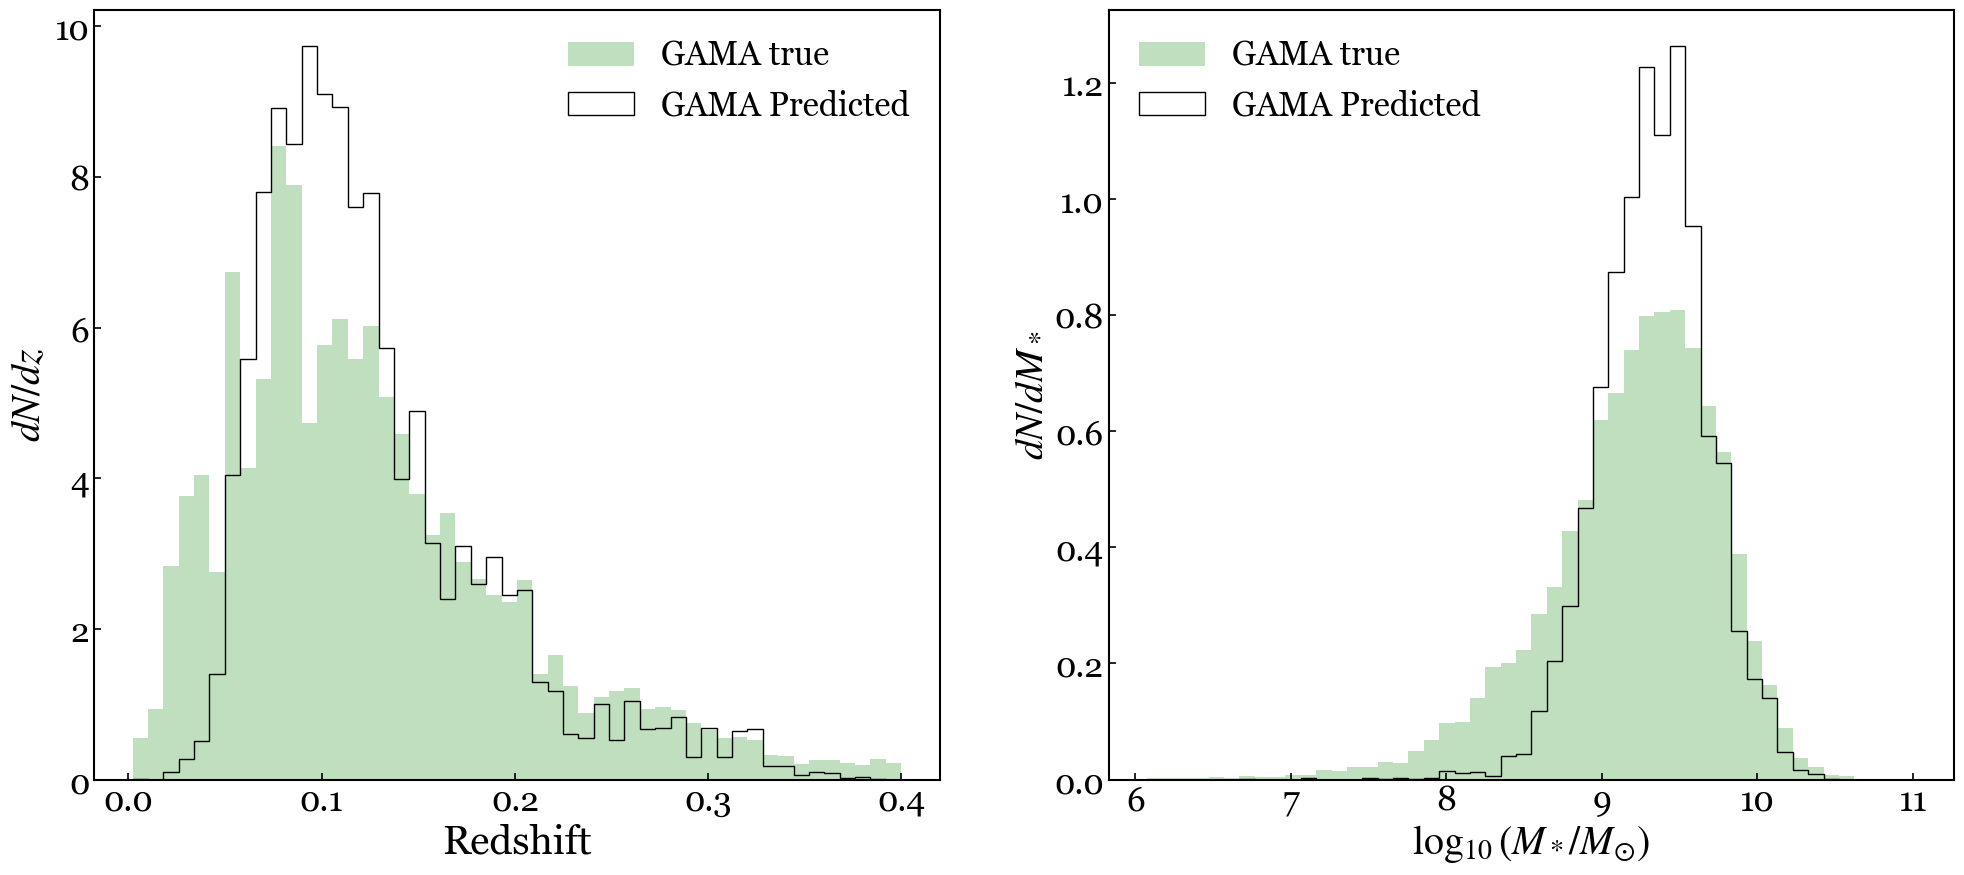

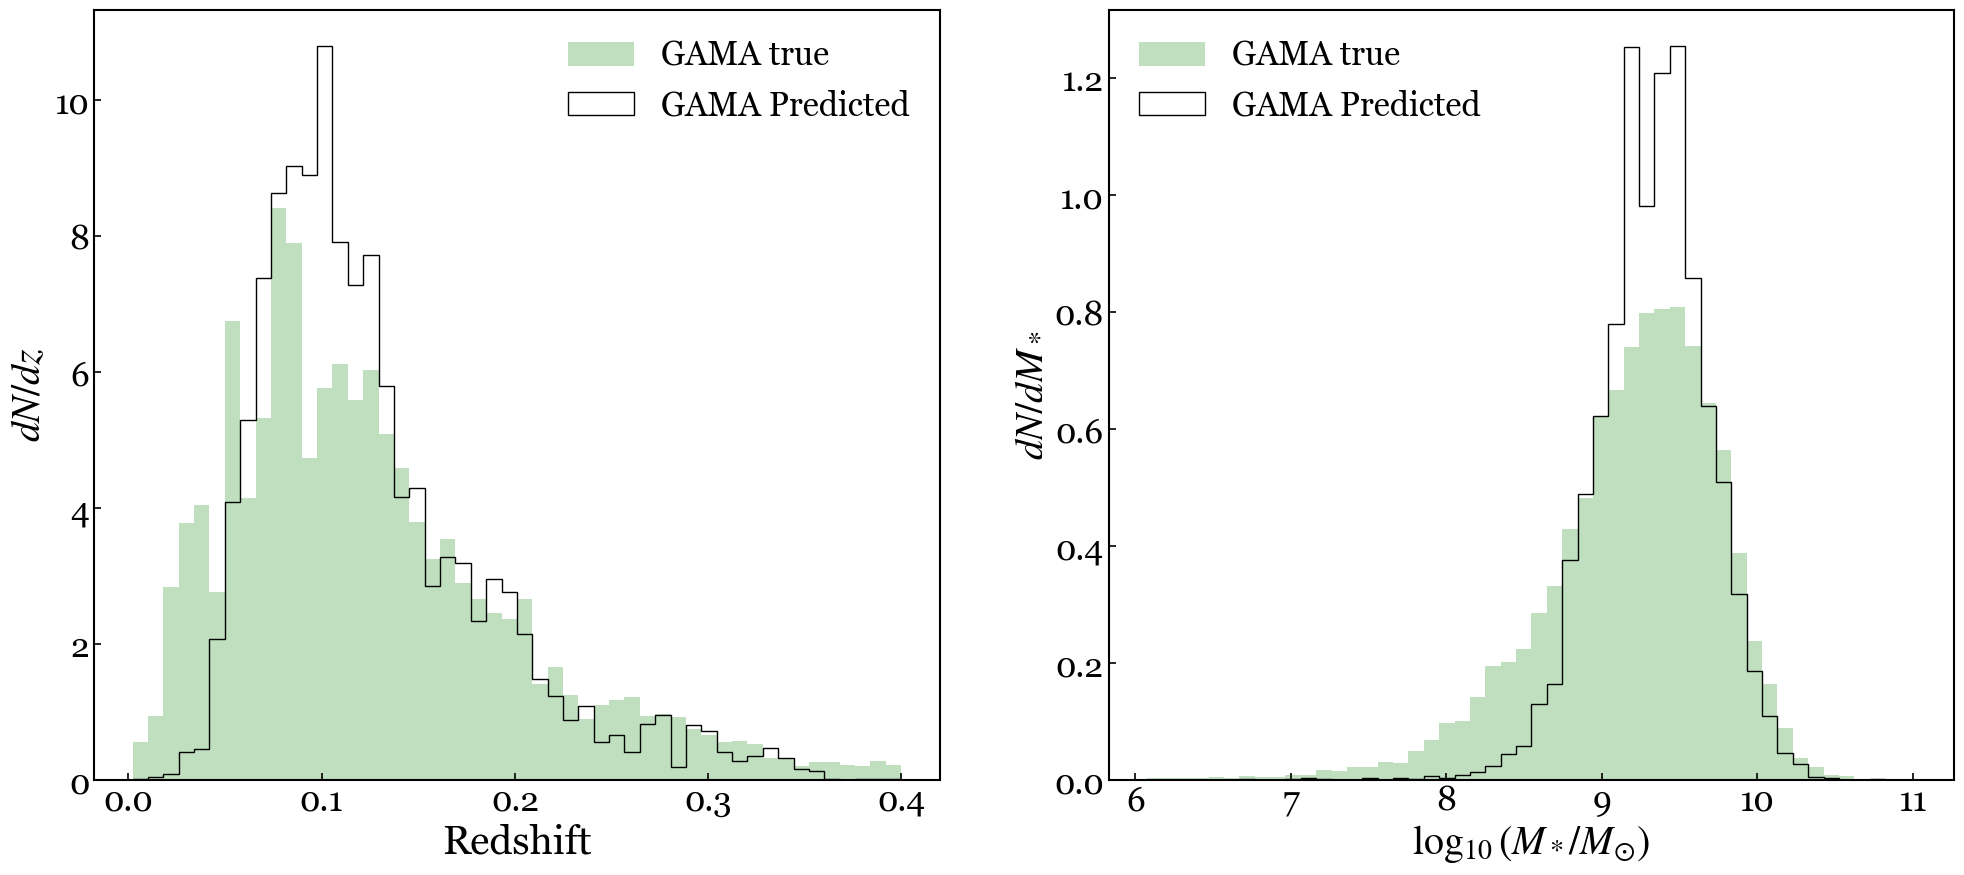

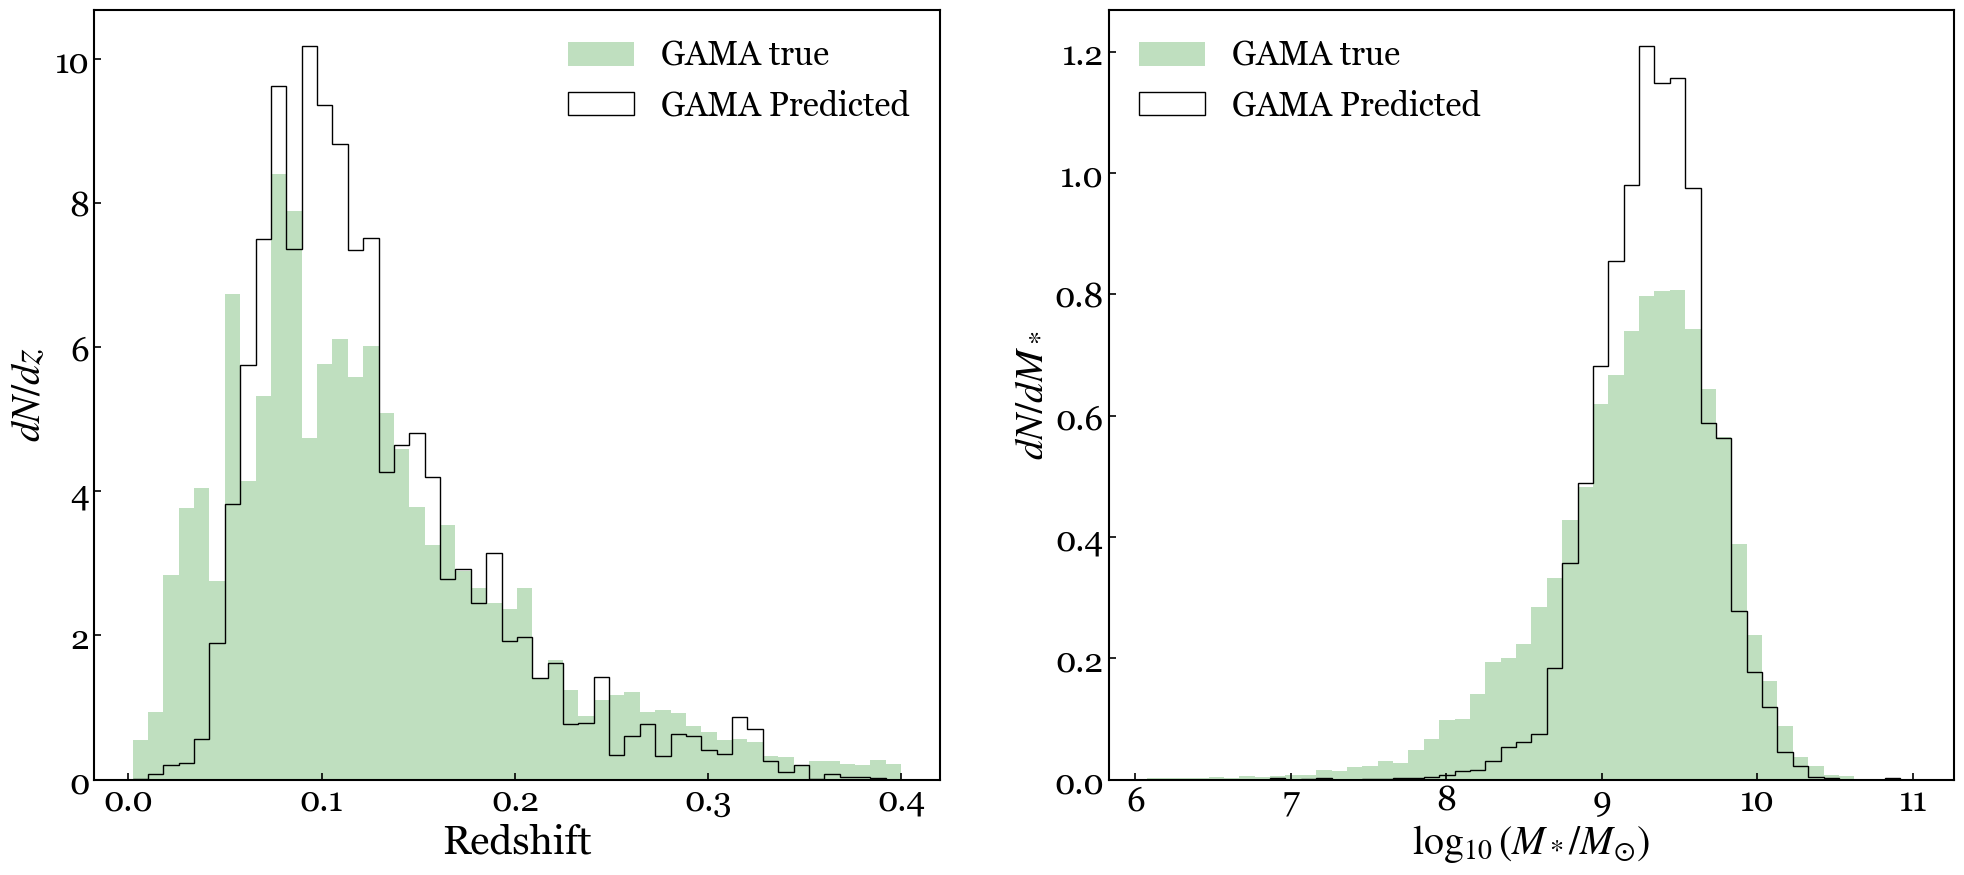

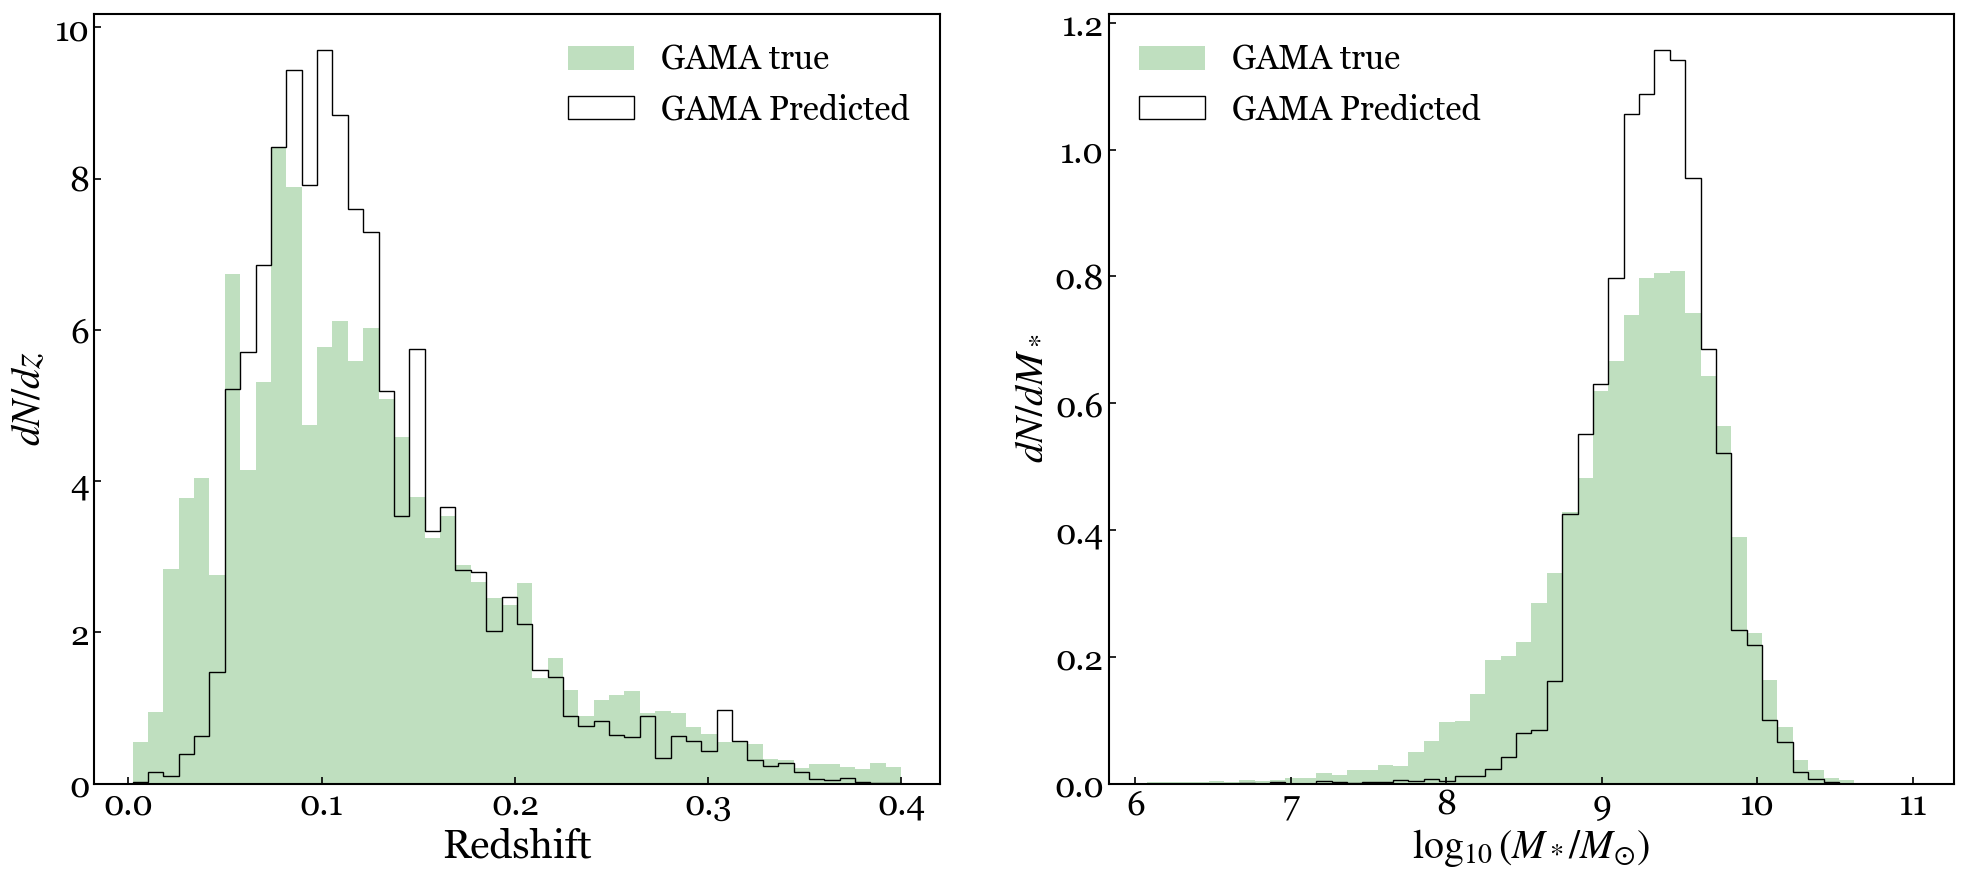

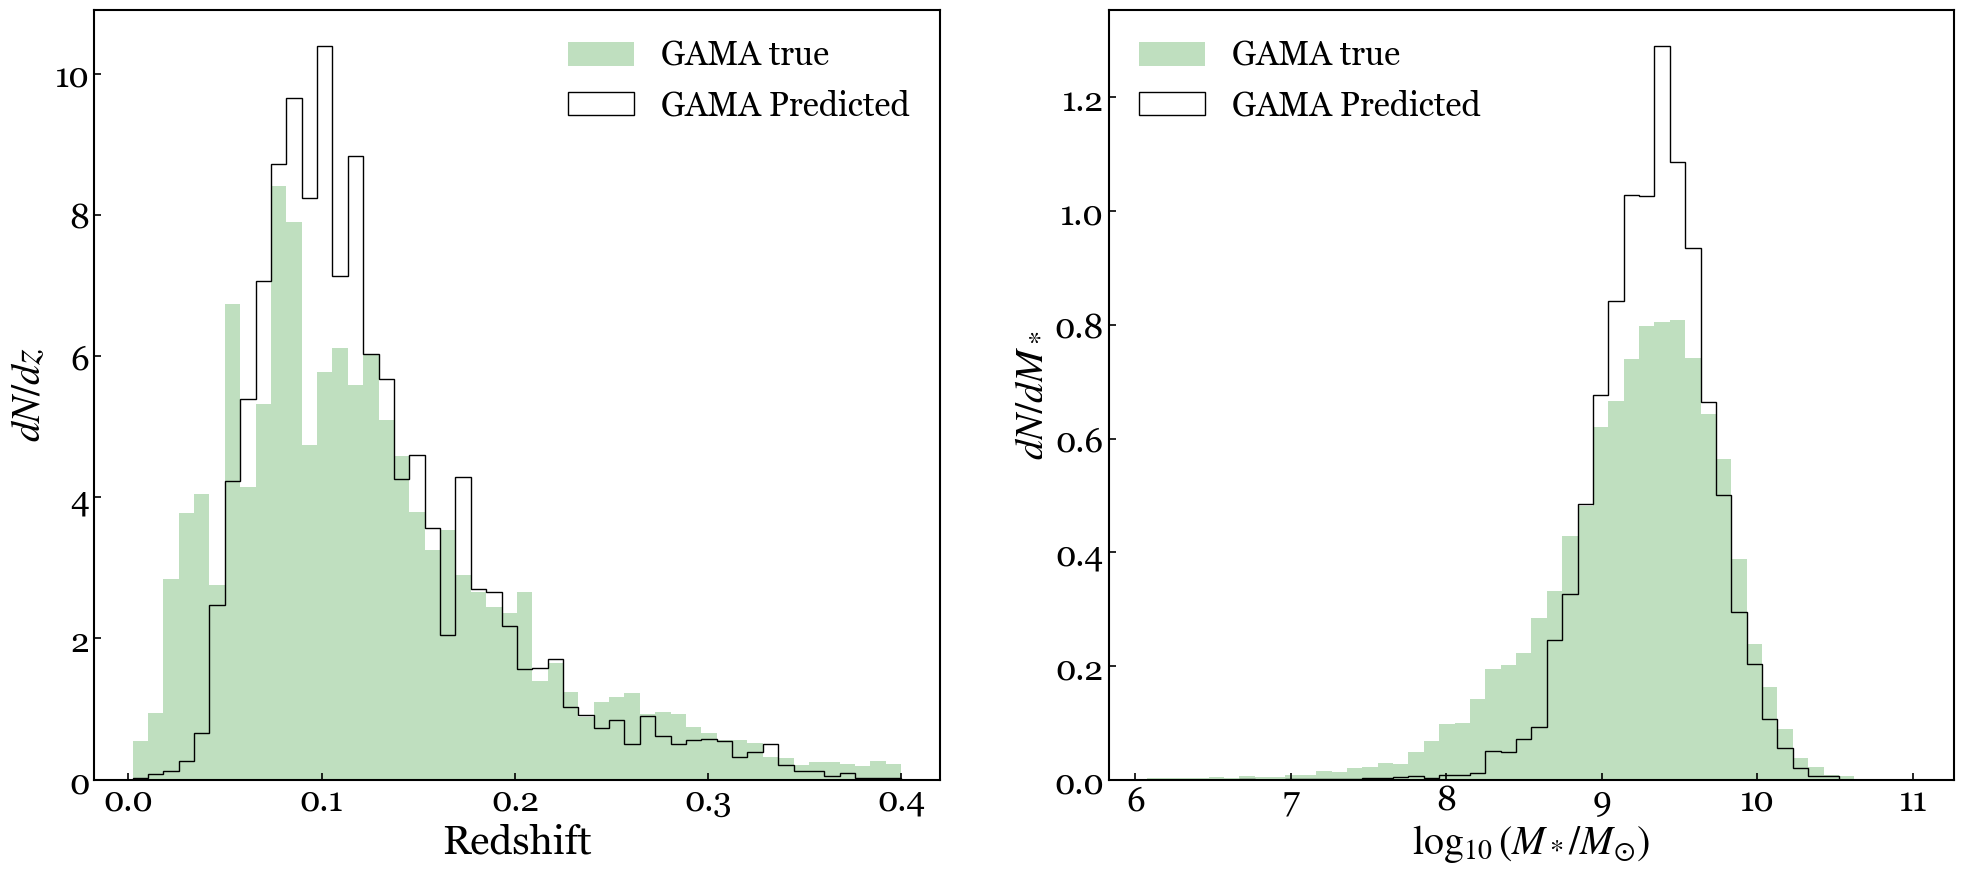

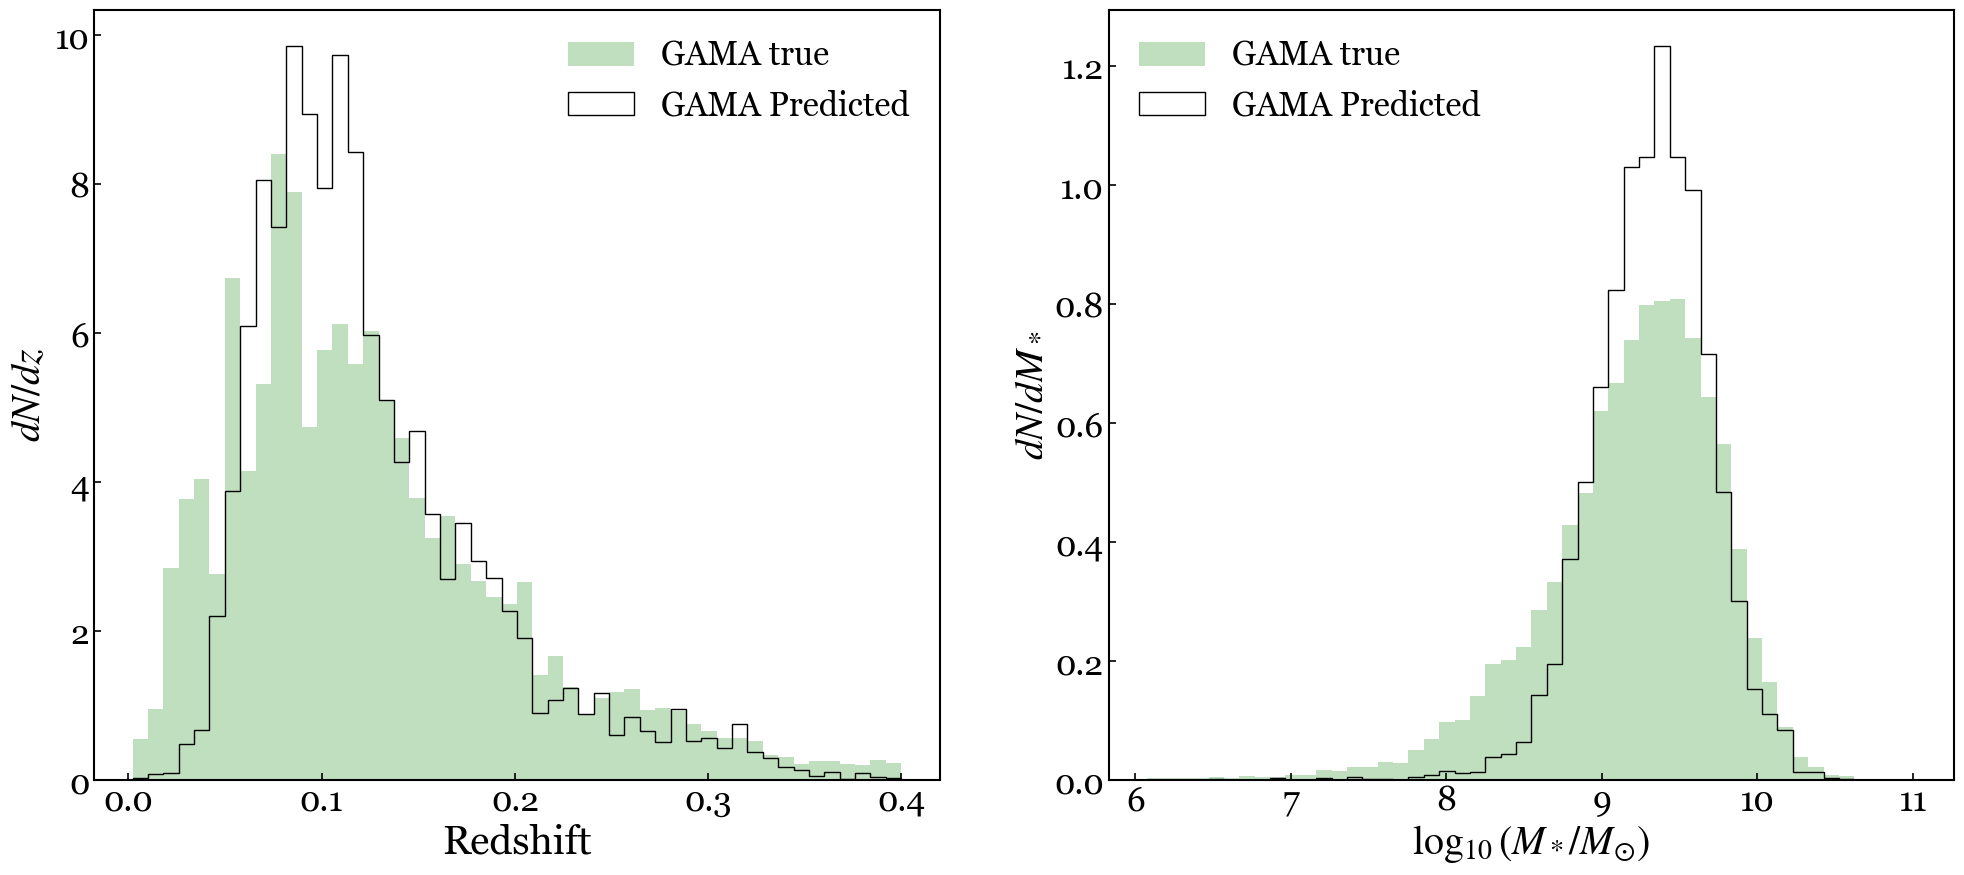

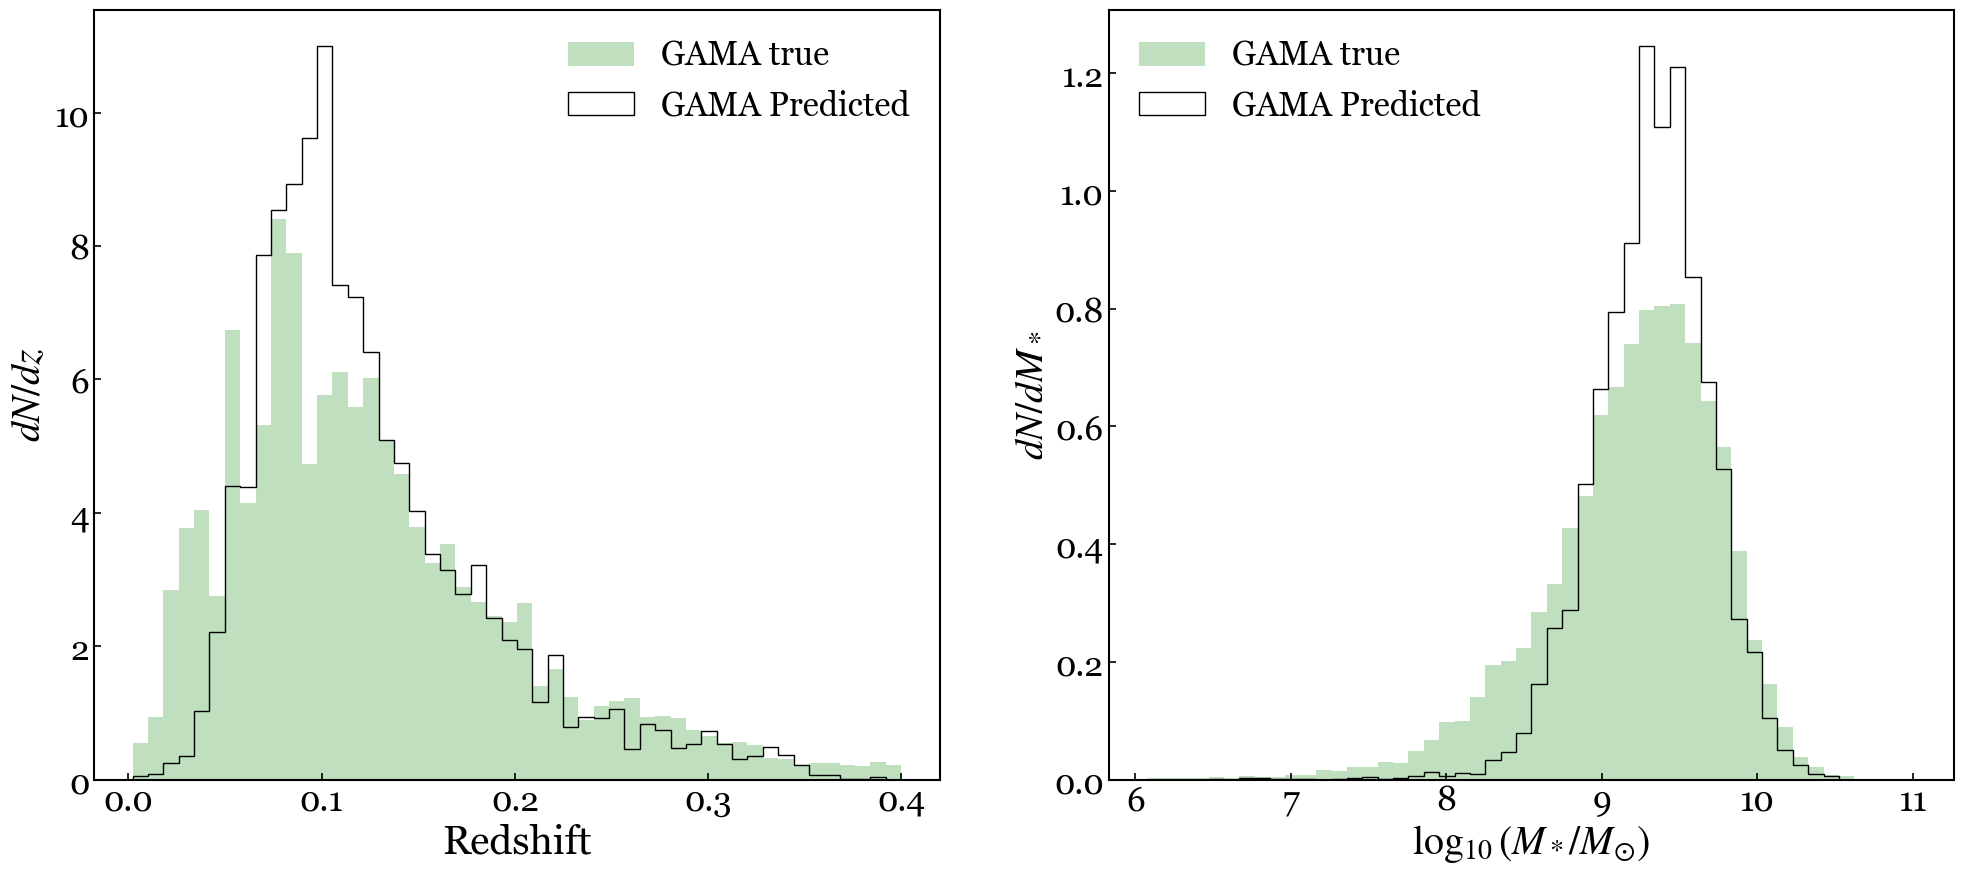

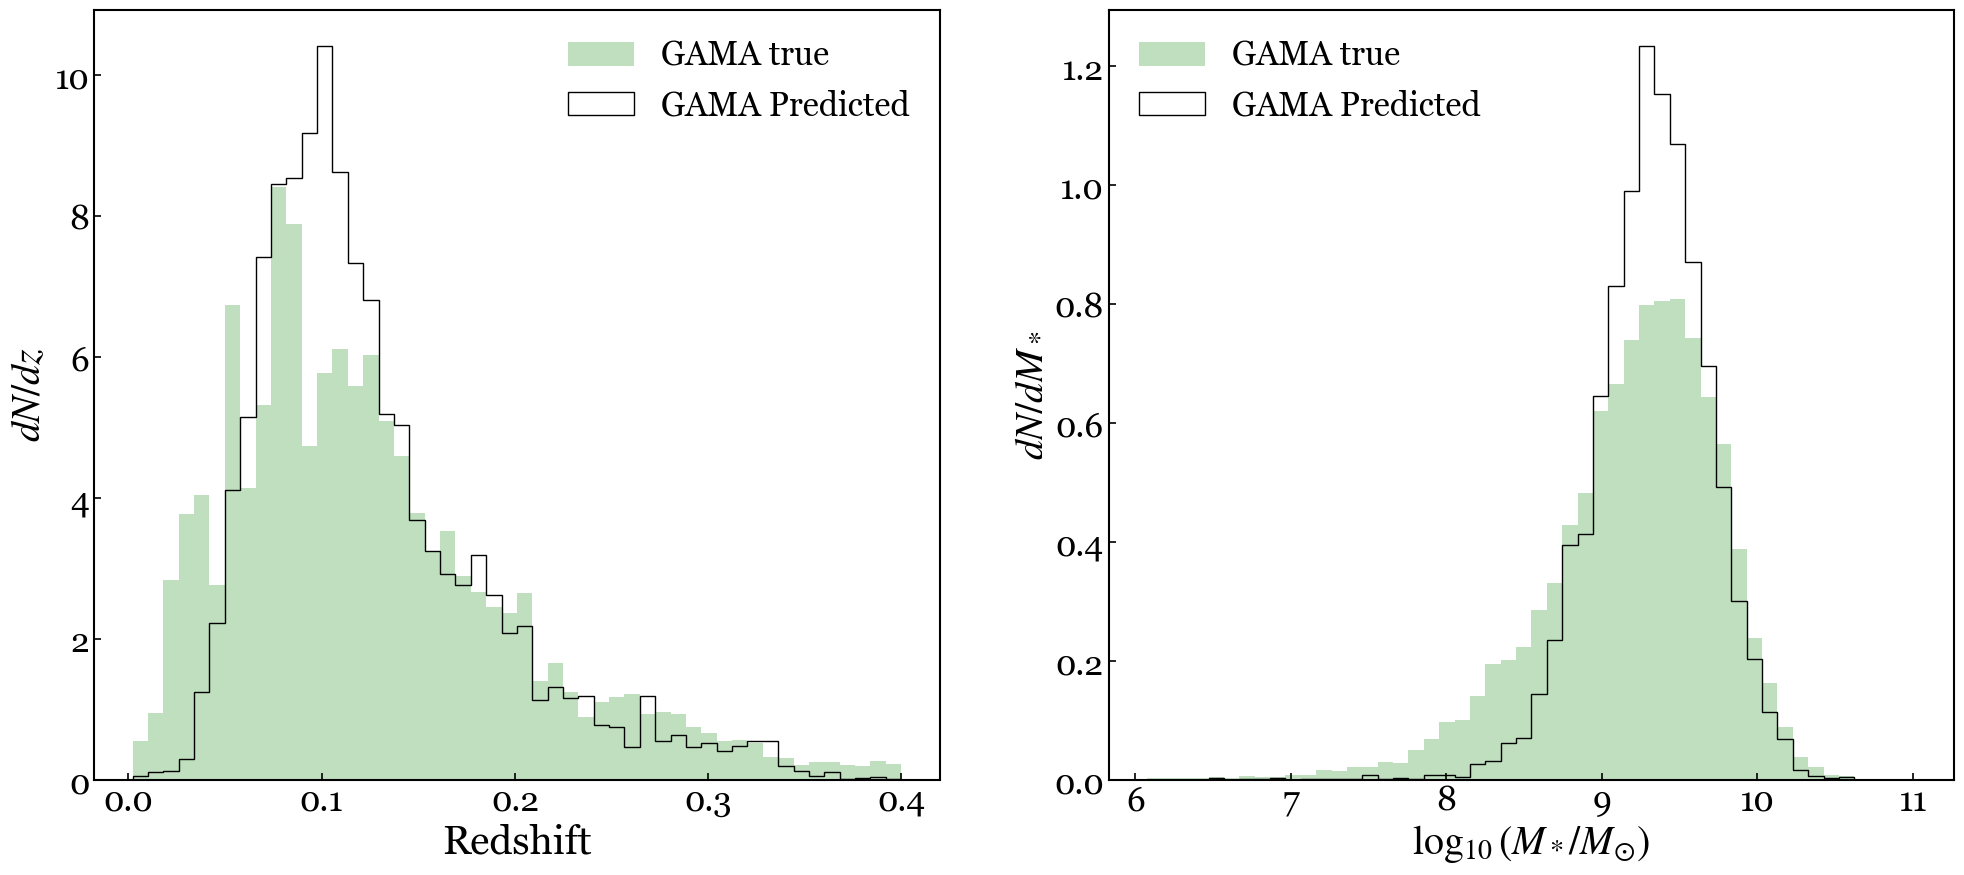

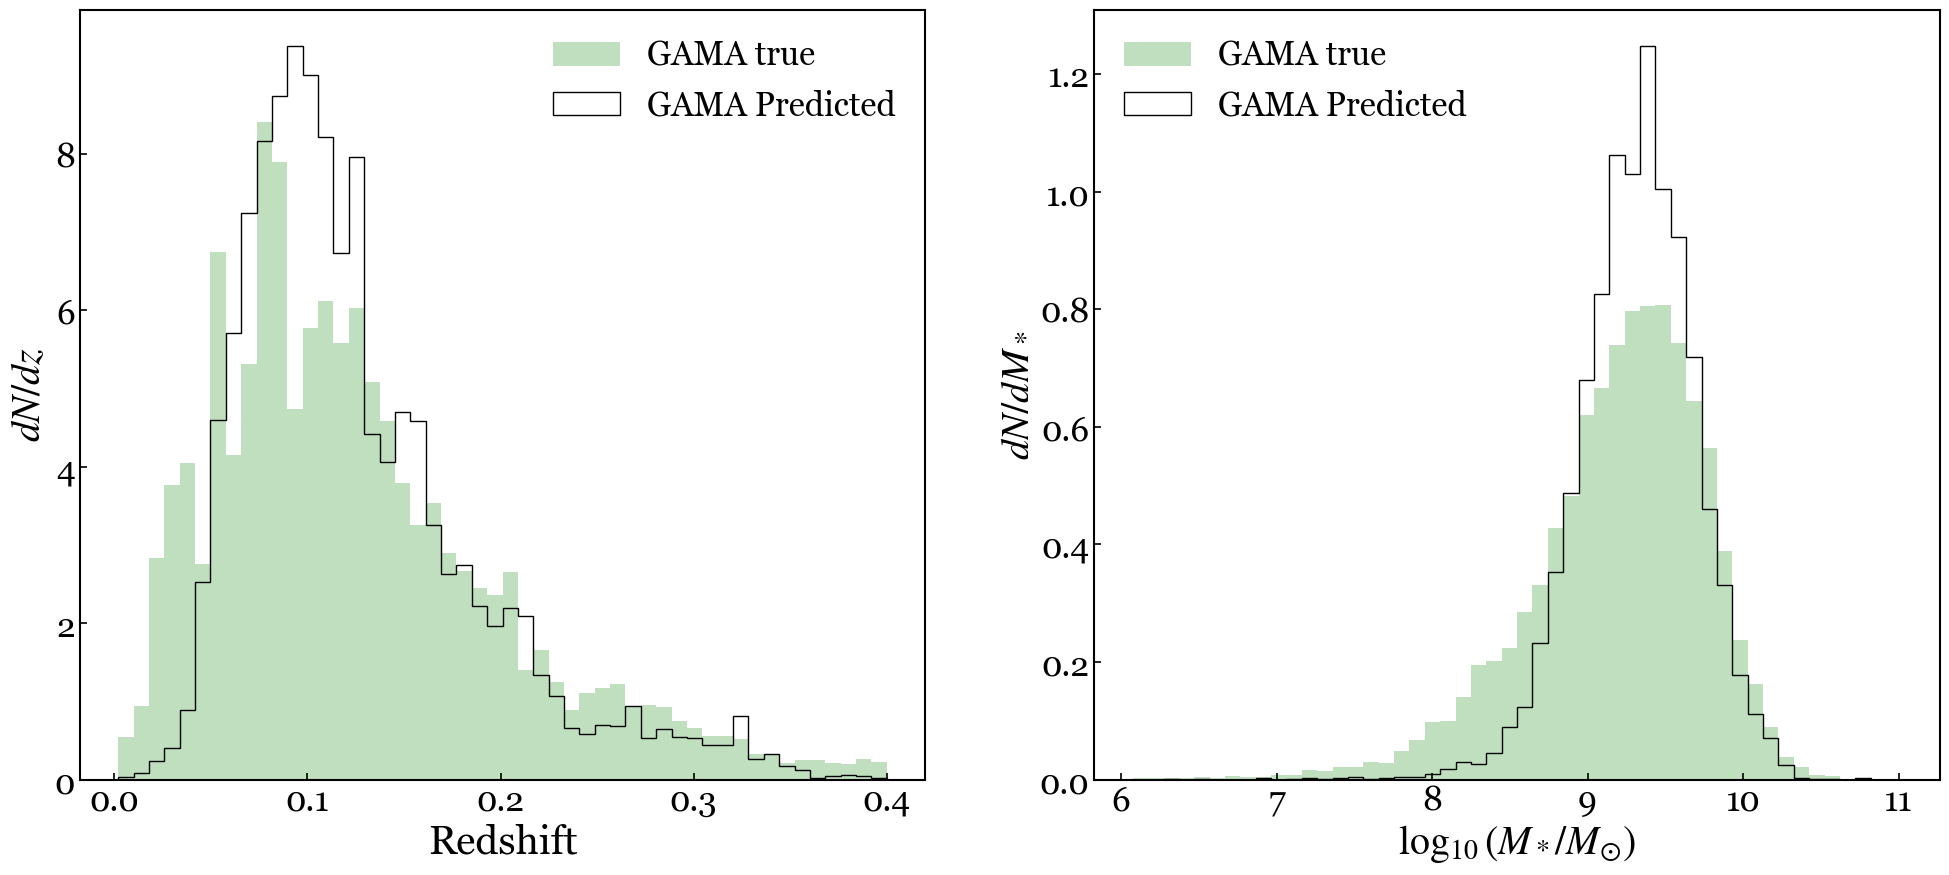

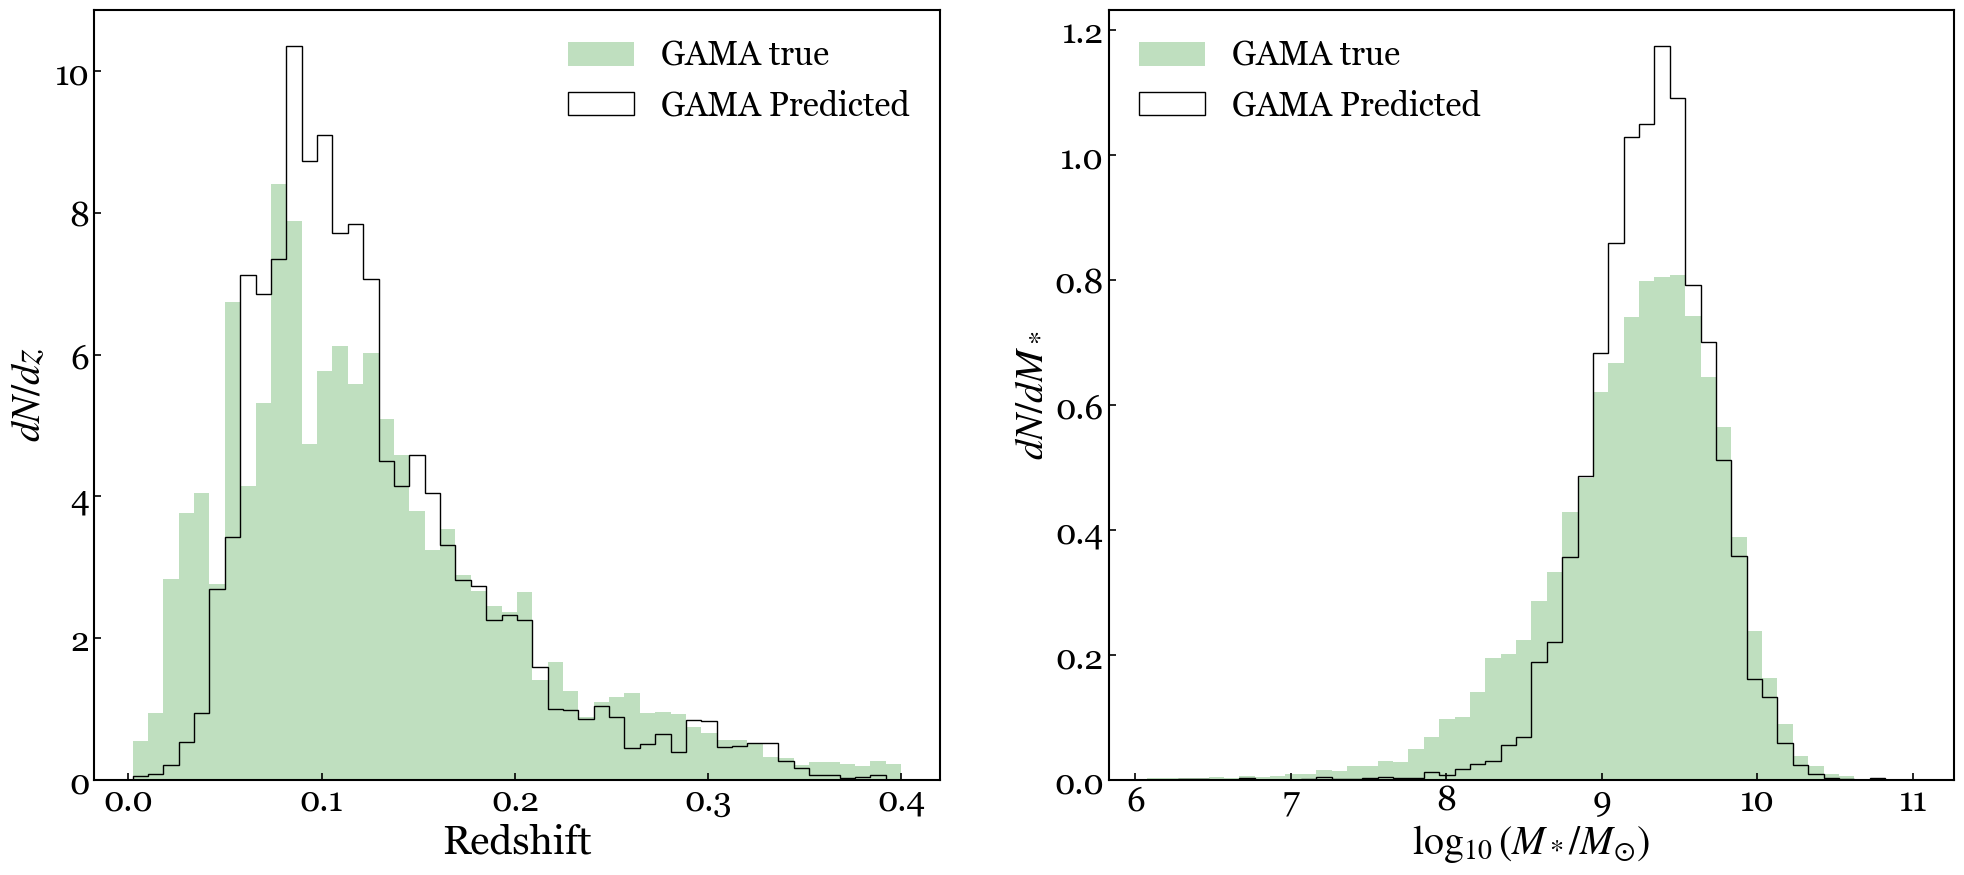

In [7]:
N_range = range(10, 66, 2)
RMSEs = []

for N in N_range:

    if not os.path.exists(f'/data2/lsajkov/mpdg/saved_soms/29Jul24_size/{N}x{N}'):
        os.mkdir(f'/data2/lsajkov/mpdg/saved_soms/29Jul24_size/{N}x{N}')

    n_rows = n_columns = N

    SOM = somoclu.Somoclu(n_columns      = n_columns,
                          n_rows         = n_rows,
                          maptype        = maptype,
                          gridtype       = gridtype,
                          initialization = initialization,
                          neighborhood   = neighborhood,
                          std_coeff      = std_coeff,
                          verbose        = verbose,
                          compactsupport = compactsupport,)

    SOM.train(data = training_data,
            epochs = epochs,
            radius0 = radius0, radiusN = radiusN, radiuscooling = radiuscooling,
            scale0 = scale0,   scaleN = scaleN,   scalecooling = scalecooling)
    
    labeling_activation_map = SOM.get_surface_state(data = labeling_data_inputs)
    labeling_bmus       = SOM.get_bmus(activation_map = labeling_activation_map)

    n_params = np.shape(labeling_data_outputs)[1]

    labeled_map_values = np.empty((n_rows, n_columns, n_params), dtype = object)
    for index, _ in np.ndenumerate(labeled_map_values):
        labeled_map_values[index] = []

    for vector_index in range(len(labeling_bmus)):
        for param in range(n_params):
            labeled_map_values[*labeling_bmus[vector_index], param].append(labeling_data_outputs[vector_index, param])

    labeled_map = np.empty((n_rows, n_columns, n_params), dtype = float)
    for index, values in np.ndenumerate(labeled_map_values):
        labeled_map[index] = np.mean(values)

    predicted_values_labeling = np.empty((len(labeling_data_inputs), n_params))

    for i, bmu in enumerate(labeling_bmus):
        predicted_values_labeling[i] = labeled_map[*bmu]

    fig = plt.figure(figsize = (24, 10))

    ax_l = fig.add_subplot(1, 2, 1)

    bins = ax_l.hist(labeling_data_outputs[:, 0], bins = 50, density = True,
                    color = 'green', alpha = 0.25, label = 'GAMA true')[1]

    ax_l.hist(predicted_values_labeling[:, 0], bins = bins, density = True,
            histtype = 'step', color = 'black', label = 'GAMA Predicted')

    ax_l.set_xlabel('Redshift')
    ax_l.set_ylabel('$dN/dz$')
    ax_l.legend(frameon = False)

    ax_r = fig.add_subplot(1, 2, 2)

    bins = ax_r.hist(np.log10(labeling_data_outputs[:, 1]), bins = 50, density = True,
                    color = 'green', alpha = 0.25, label = 'GAMA true')[1]

    ax_r.hist(np.log10(predicted_values_labeling[:, 1]), bins = bins, density = True,
            histtype = 'step', color = 'black', label = 'GAMA Predicted')
    ax_r.set_xlabel('$\log_{10}(M_*/M_{\odot})$')
    ax_r.set_ylabel('$dN/dM_*$')
    ax_r.legend(frameon = False)

    RMSEs.append(np.sqrt(np.mean(labeling_data_outputs[:, 0] ** 2 -\
                                 predicted_values_labeling[:, 0] ** 2)))
    
    fig.savefig(f'/data2/lsajkov/mpdg/saved_soms/29Jul24_size/{N}x{N}/{N}x{N}_dist')
    np.save(f'/data2/lsajkov/mpdg/saved_soms/29Jul24_size/{N}x{N}/{N}x{N}_codebook', SOM.codebook, allow_pickle = True)
    np.save(f'/data2/lsajkov/mpdg/saved_soms/29Jul24_size/{N}x{N}/{N}x{N}_labeled_map_values', labeled_map_values, allow_pickle = True)
    np.save(f'/data2/lsajkov/mpdg/saved_soms/29Jul24_size/{N}x{N}/{N}x{N}_labeled_map', labeled_map, allow_pickle = True)
    np.save(f'/data2/lsajkov/mpdg/saved_soms/29Jul24_size/{N}x{N}/{N}x{N}_data_bmus', SOM.bmus, allow_pickle = True)

    np.save(f'/data2/lsajkov/mpdg/saved_soms/29Jul24_size/{N}x{N}/{N}x{N}_labeling_bmus', labeling_bmus, allow_pickle = True)

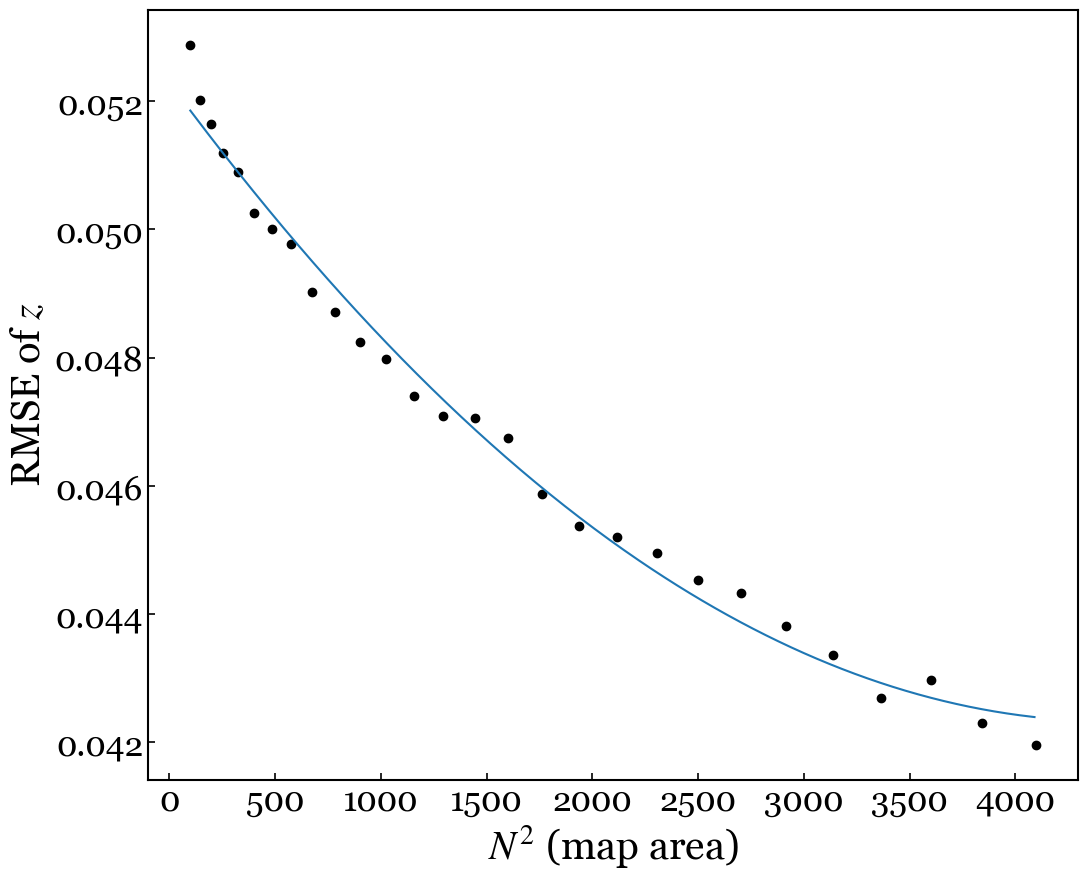

In [25]:
fig = plt.figure(figsize = (12, 10))
ax = fig.add_subplot()

ax.scatter(np.array(N_range)**2, RMSEs, color = 'black')
ax.set_xlabel('$N^2$ (map area)')
ax.set_ylabel('RMSE of $z$')

a, b, c = np.polyfit(np.array(N_range)**2, RMSEs, deg = 2)

x_vals = np.arange(100, 4100, 10)
ax.plot(x_vals, a * x_vals ** 2 + b * x_vals  + c)